In [227]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [228]:
import matplotlib.pyplot as plt

In [229]:
data=pd.read_csv('owid-covid-data.csv')

In [230]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [231]:
columns={'Albania','Armenia','Azerbijan','Bangladesh','Benin','Brazil','Cambodia','Chile','China','Colombia','Dominican republic','Ecuador','Egypt','El Salvador','Georgia',
'Hong kong','Indonesia','Kazakhstan','Democratic Republic','Malaysia','Mexico,Nepal','Oman','Pakistan','Panama','Paraguay','Philippines','South Africa','Sri Lanka',
'Tajikistan','Thailand','Timor-Leste','Togo,Tunisia','Turkey','Ukraine','United Republic of Tanzania','Uruguay','zimbabwe'
}

In [232]:
column1=set(data.location)

In [233]:
cols_to_consider=column1.intersection(columns)

In [234]:
cols_to_consider

{'Albania',
 'Armenia',
 'Bangladesh',
 'Benin',
 'Brazil',
 'Cambodia',
 'Chile',
 'China',
 'Colombia',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Georgia',
 'Indonesia',
 'Kazakhstan',
 'Malaysia',
 'Oman',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Philippines',
 'South Africa',
 'Sri Lanka',
 'Tajikistan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'Uruguay'}

In [235]:
new_data=data[data.location.isin(cols_to_consider)]
new_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1091,ALB,Europe,Albania,25-02-2020,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1092,ALB,Europe,Albania,26-02-2020,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1093,ALB,Europe,Albania,27-02-2020,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1094,ALB,Europe,Albania,28-02-2020,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1095,ALB,Europe,Albania,29-02-2020,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105386,URY,South America,Uruguay,12-08-2021,382997.0,124.0,120.286,5996.0,5.0,2.000,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105387,URY,South America,Uruguay,13-08-2021,383101.0,104.0,115.143,5998.0,2.0,1.714,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105388,URY,South America,Uruguay,14-08-2021,383212.0,111.0,121.714,6001.0,3.0,2.143,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105389,URY,South America,Uruguay,15-08-2021,383292.0,80.0,112.286,6003.0,2.0,2.429,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN


In [236]:
new_data.shape

(15103, 62)

In [237]:
new_data.location.nunique()

28

In [238]:
after_vaccination=new_data[new_data.total_vaccinations.isnull()==False]

In [239]:
after_vaccination.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1411,ALB,Europe,Albania,10-01-2021,63595.0,562.0,593.857,1241.0,8.0,6.857,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1413,ALB,Europe,Albania,12-01-2021,64627.0,656.0,620.571,1252.0,5.0,6.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1414,ALB,Europe,Albania,13-01-2021,65334.0,707.0,618.000,1256.0,4.0,5.571,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1415,ALB,Europe,Albania,14-01-2021,65994.0,660.0,612.714,1261.0,5.0,5.429,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1416,ALB,Europe,Albania,15-01-2021,66635.0,641.0,608.143,1265.0,4.0,5.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN


In [240]:
after_vaccination.shape

(3545, 62)

In [241]:
after_vaccination.isnull().sum()[1:61]

continent                                   0
location                                    0
date                                        0
total_cases                                 0
new_cases                                   0
new_cases_smoothed                          0
total_deaths                               25
new_deaths                                 26
new_deaths_smoothed                         0
total_cases_per_million                     0
new_cases_per_million                       0
new_cases_smoothed_per_million              0
total_deaths_per_million                   25
new_deaths_per_million                     26
new_deaths_smoothed_per_million             0
reproduction_rate                          39
icu_patients                             3545
icu_patients_per_million                 3545
hosp_patients                            3545
hosp_patients_per_million                3545
weekly_icu_admissions                    3545
weekly_icu_admissions_per_million 

In [242]:
after_vaccination.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [243]:
after_vaccination.loc[after_vaccination['location']=='Thailand'].positive_rate.isnull().sum()

140

In the following few cells we are finding the locations which have more than 90% of the values missing in new_test_per_thousand column

In [244]:
u=set()

In [245]:
for column in cols_to_consider:
    if(after_vaccination.loc[after_vaccination['location']==column].new_tests_per_thousand.isnull().sum()>after_vaccination.loc[after_vaccination['location']==column].shape[0]*0.9):
        u.add(column)

In [246]:
for column in cols_to_consider:
    if(after_vaccination.loc[after_vaccination['location']==column].handwashing_facilities.isnull().sum()>0):
        u.add(column)

In [247]:
for column in cols_to_consider:
    if(after_vaccination.loc[after_vaccination['location']==column].handwashing_facilities.isnull().sum()>after_vaccination.loc[after_vaccination['location']==column].handwashing_facilities.shape[0]*0.9):
        u.add(column)

In [248]:
len(u)

15

In [249]:
len(cols_to_consider)

28

In [250]:
final_loc_consider=cols_to_consider.intersection(u)

In [251]:
len(final_loc_consider)

15

In [252]:
after_vacc_data=after_vaccination[after_vaccination.location.isin(final_loc_consider)]
after_vacc_data.head(105390)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1411,ALB,Europe,Albania,10-01-2021,63595.0,562.0,593.857,1241.0,8.0,6.857,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1413,ALB,Europe,Albania,12-01-2021,64627.0,656.0,620.571,1252.0,5.0,6.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1414,ALB,Europe,Albania,13-01-2021,65334.0,707.0,618.000,1256.0,4.0,5.571,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1415,ALB,Europe,Albania,14-01-2021,65994.0,660.0,612.714,1261.0,5.0,5.429,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1416,ALB,Europe,Albania,15-01-2021,66635.0,641.0,608.143,1265.0,4.0,5.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105386,URY,South America,Uruguay,12-08-2021,382997.0,124.0,120.286,5996.0,5.0,2.000,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105387,URY,South America,Uruguay,13-08-2021,383101.0,104.0,115.143,5998.0,2.0,1.714,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105388,URY,South America,Uruguay,14-08-2021,383212.0,111.0,121.714,6001.0,3.0,2.143,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN
105389,URY,South America,Uruguay,15-08-2021,383292.0,80.0,112.286,6003.0,2.0,2.429,...,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817,NaN


In [253]:
after_vacc_data.isnull().sum()[1:61]

continent                                   0
location                                    0
date                                        0
total_cases                                 0
new_cases                                   0
new_cases_smoothed                          0
total_deaths                                0
new_deaths                                  0
new_deaths_smoothed                         0
total_cases_per_million                     0
new_cases_per_million                       0
new_cases_smoothed_per_million              0
total_deaths_per_million                    0
new_deaths_per_million                      0
new_deaths_smoothed_per_million             0
reproduction_rate                          19
icu_patients                             1978
icu_patients_per_million                 1978
hosp_patients                            1978
hosp_patients_per_million                1978
weekly_icu_admissions                    1978
weekly_icu_admissions_per_million 

In [254]:
after_vacc_data.shape

(1978, 62)

In [255]:
#These are columns which are completely empty
after_vacc_data.drop(['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million' ,'weekly_icu_admissions' ,'weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million'],axis=1,inplace=True)

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [256]:
after_vacc_data.drop('weekly_hosp_admissions',axis=1,inplace=True)

In [257]:
after_vacc_data.drop('total_boosters',axis=1,inplace=True)

In [258]:
after_vacc_data.drop('total_boosters_per_hundred',axis=1,inplace=True)

In [259]:
after_vacc_data['handwashing_facilities'].isnull().sum()

1858

In [260]:
after_vacc_data.location.unique()

array(['Albania', 'Benin', 'Brazil', 'Chile', 'China', 'Egypt', 'Georgia',
       'Malaysia', 'Oman', 'Panama', 'Sri Lanka', 'Tajikistan', 'Turkey',
       'Ukraine', 'Uruguay'], dtype=object)

In [261]:
for cols in after_vacc_data.location.unique():
    print(cols," ",after_vacc_data.loc[after_vacc_data.location==cols].handwashing_facilities.isnull().sum()," ",after_vacc_data.loc[after_vacc_data.location==cols].handwashing_facilities.shape[0])

Albania   138   138
Benin   0   8
Brazil   184   184
Chile   234   234
China   160   160
Egypt   0   31
Georgia   98   98
Malaysia   174   174
Oman   0   66
Panama   161   161
Sri Lanka   161   161
Tajikistan   0   15
Turkey   215   215
Ukraine   162   162
Uruguay   171   171


In [262]:
after_vacc_data.drop('handwashing_facilities',axis=1,inplace=True)
after_vacc_data.drop('excess_mortality',axis=1,inplace=True)

In [263]:
after_vacc_data.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         0
total_deaths                               0
new_deaths                                 0
new_deaths_smoothed                        0
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             0
total_deaths_per_million                   0
new_deaths_per_million                     0
new_deaths_smoothed_per_million            0
reproduction_rate                         19
new_tests                                755
total_tests                              690
total_tests_per_thousand                 690
new_tests_per_thousand                   755
new_tests_smoothed                       568
new_tests_

In [264]:
for cols in after_vacc_data.location.unique():
    print(cols," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand.isnull().sum()," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand.shape[0])

Albania   45   138
Benin   8   8
Brazil   184   184
Chile   0   234
China   160   160
Egypt   31   31
Georgia   9   98
Malaysia   0   174
Oman   66   66
Panama   2   161
Sri Lanka   2   161
Tajikistan   15   15
Turkey   44   215
Ukraine   0   162
Uruguay   2   171


In [265]:
y=set()

In [266]:
for cols in after_vacc_data.location.unique():
    if(after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .isnull().sum()<after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .shape[0]*0.8):
        print(cols," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .isnull().sum()," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .shape[0])
        y.add(cols)

Albania   45   138
Chile   0   234
Georgia   9   98
Malaysia   0   174
Panama   2   161
Sri Lanka   2   161
Turkey   44   215
Ukraine   0   162
Uruguay   2   171


In [267]:
final_loc_consider=cols_to_consider.intersection(y)

In [268]:
final_loc_consider

{'Albania',
 'Chile',
 'Georgia',
 'Malaysia',
 'Panama',
 'Sri Lanka',
 'Turkey',
 'Ukraine',
 'Uruguay'}

In [269]:
after_vacc_data_new=after_vacc_data

In [270]:
after_vacc_data_new=after_vacc_data[after_vacc_data.location.isin(final_loc_consider)]
after_vacc_data_new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1411,ALB,Europe,Albania,10-01-2021,63595.0,562.0,593.857,1241.0,8.0,6.857,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1413,ALB,Europe,Albania,12-01-2021,64627.0,656.0,620.571,1252.0,5.0,6.000,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1414,ALB,Europe,Albania,13-01-2021,65334.0,707.0,618.000,1256.0,4.0,5.571,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1415,ALB,Europe,Albania,14-01-2021,65994.0,660.0,612.714,1261.0,5.0,5.429,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1416,ALB,Europe,Albania,15-01-2021,66635.0,641.0,608.143,1265.0,4.0,5.000,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105386,URY,South America,Uruguay,12-08-2021,382997.0,124.0,120.286,5996.0,5.0,2.000,...,10.361,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817
105387,URY,South America,Uruguay,13-08-2021,383101.0,104.0,115.143,5998.0,2.0,1.714,...,10.361,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817
105388,URY,South America,Uruguay,14-08-2021,383212.0,111.0,121.714,6001.0,3.0,2.143,...,10.361,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817
105389,URY,South America,Uruguay,15-08-2021,383292.0,80.0,112.286,6003.0,2.0,2.429,...,10.361,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817


In [271]:

after_vacc_data_new.isnull().sum()[1:61]

continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         0
total_deaths                               0
new_deaths                                 0
new_deaths_smoothed                        0
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             0
total_deaths_per_million                   0
new_deaths_per_million                     0
new_deaths_smoothed_per_million            0
reproduction_rate                         13
new_tests                                291
total_tests                              226
total_tests_per_thousand                 226
new_tests_per_thousand                   291
new_tests_smoothed                       104
new_tests_smoothed_per_thousand          104
positive_r

In [272]:
#Filling the missing values in new_tests_smoothed_per_thousand
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_tests_smoothed_per_thousand .isnull().sum()>0):
        after_vacc_data_new.new_tests_smoothed_per_thousand.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_tests_smoothed_per_thousand.mean(),inplace=True)
        

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [273]:
after_vacc_data_new.drop(['new_tests','total_tests','new_tests_smoothed','total_tests_per_thousand'],axis=1,inplace=True)

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [274]:
after_vacc_data_new.drop(['new_tests_per_thousand'],axis=1,inplace=True)

In [275]:
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate .isnull().sum()<after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate.shape[0]*0.8):
        print(cols," ",after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate .isnull().sum()," ",after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate.shape[0])
        y.add(cols)

Albania   45   138
Chile   0   234
Georgia   9   98
Malaysia   0   174
Panama   2   161
Sri Lanka   2   161
Turkey   44   215
Ukraine   0   162
Uruguay   2   171


In [276]:
after_vacc_data_new.tests_units.mode()

0    tests performed
dtype: object

 **Below we have done the missing data imputation using mean and mode values-**

In [277]:
#Filling the missing values in positive_rate
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate.isnull().sum()>0):
        after_vacc_data_new.positive_rate.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].positive_rate.mean(),inplace=True)
        

In [278]:
#Filling the missing values in tests_per_case
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].tests_per_case.isnull().sum()>0):
        after_vacc_data_new.tests_per_case.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].tests_per_case.mean(),inplace=True)
        

In [279]:
#Filling the missing values in tests_units with mode
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].tests_units.isnull().sum()>0):
        after_vacc_data_new.tests_units.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].tests_units.mode()[0],axis=0,inplace=True)
        

In [280]:
#Filling the missing values in total_vaccinations
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].total_vaccinations.isnull().sum()>0):
        after_vacc_data_new.total_vaccinations.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].total_vaccinations.mean(),inplace=True)
        

In [281]:
#Filling the missing values in people_vaccinated
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_vaccinated.isnull().sum()>0):
        after_vacc_data_new.people_vaccinated.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_vaccinated.mean(),inplace=True)
        

In [282]:



#Filling the missing values in reproduction_rate
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].reproduction_rate.isnull().sum()>0):
        after_vacc_data_new.reproduction_rate.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].reproduction_rate.mean(),inplace=True)
        

In [283]:
#Filling the missing values in people_fully_vaccinated
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_fully_vaccinated.isnull().sum()>0):
        after_vacc_data_new.people_fully_vaccinated.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_fully_vaccinated.median(),inplace=True)
        

In [284]:
#Filling the missing values in people_fully_vaccinated
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_vaccinated_per_hundred.isnull().sum()>0):
        after_vacc_data_new.people_vaccinated_per_hundred.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_vaccinated_per_hundred.mean(),inplace=True)
        

In [285]:
#Filling the missing values in new_vaccinations
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations.isnull().sum()>0):
        after_vacc_data_new.new_vaccinations.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations.mean(),inplace=True)
        

In [286]:
#Filling the missing values in new_vaccinations
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations.isnull().sum()>0):
        after_vacc_data_new.new_vaccinations.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations.mean(),inplace=True)
        

In [287]:
#Filling the missing values in people_fully_vaccinated_per_hundred
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_fully_vaccinated_per_hundred.isnull().sum()>0):
        after_vacc_data_new.people_fully_vaccinated_per_hundred.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].people_fully_vaccinated_per_hundred.mean(),inplace=True)
        

In [288]:
#Filling the missing values in stringency_index
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].stringency_index.isnull().sum()>0):
        after_vacc_data_new.stringency_index.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].stringency_index.mean(),inplace=True)
        

In [289]:
#Filling the missing values in new_vaccinations_smoothed_per_million
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations_smoothed_per_million.isnull().sum()>0):
        after_vacc_data_new.new_vaccinations_smoothed_per_million.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations_smoothed_per_million.mean(),inplace=True)
        

In [290]:
#Filling the missing values in new_vaccinations_smoothed_per_million
for cols in after_vacc_data_new.location.unique():
    if(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations_smoothed_per_million.isnull().sum()>0):
        after_vacc_data_new.new_vaccinations_smoothed_per_million.fillna(after_vacc_data_new.loc[after_vacc_data_new.location==cols].new_vaccinations_smoothed_per_million.mean(),inplace=True)
        

In [291]:
after_vacc_data_new.tests_units.mode() 

0    tests performed
dtype: object

In [292]:
after_vacc_data_new.location.value_counts()

Chile        234
Turkey       215
Malaysia     174
Uruguay      171
Ukraine      162
Panama       161
Sri Lanka    161
Albania      138
Georgia       98
Name: location, dtype: int64

In [293]:
after_vacc_data_new.corr().new_cases.sort_values(ascending = False)

new_cases                                1.000000
new_cases_smoothed                       0.978385
new_deaths                               0.664269
new_deaths_smoothed                      0.640074
population                               0.614507
total_cases                              0.569282
people_fully_vaccinated                  0.419426
total_vaccinations                       0.417979
people_vaccinated                        0.413858
new_vaccinations_smoothed                0.405483
total_deaths                             0.375454
new_vaccinations                         0.367616
new_cases_per_million                    0.334810
new_cases_smoothed_per_million           0.323222
positive_rate                            0.320626
gdp_per_capita                           0.303927
diabetes_prevalence                      0.280356
reproduction_rate                        0.187627
male_smokers                             0.173655
stringency_index                         0.141618


In [294]:
after_vacc_data_new.tests_units.value_counts()

tests performed    1340
people tested       174
Name: tests_units, dtype: int64

In [295]:
after_vacc_data_new.population.unique()

array([ 2877800., 19116209.,  3989175., 32365998.,  4314768., 21413250.,
       84339067., 43733759.,  3473727.])

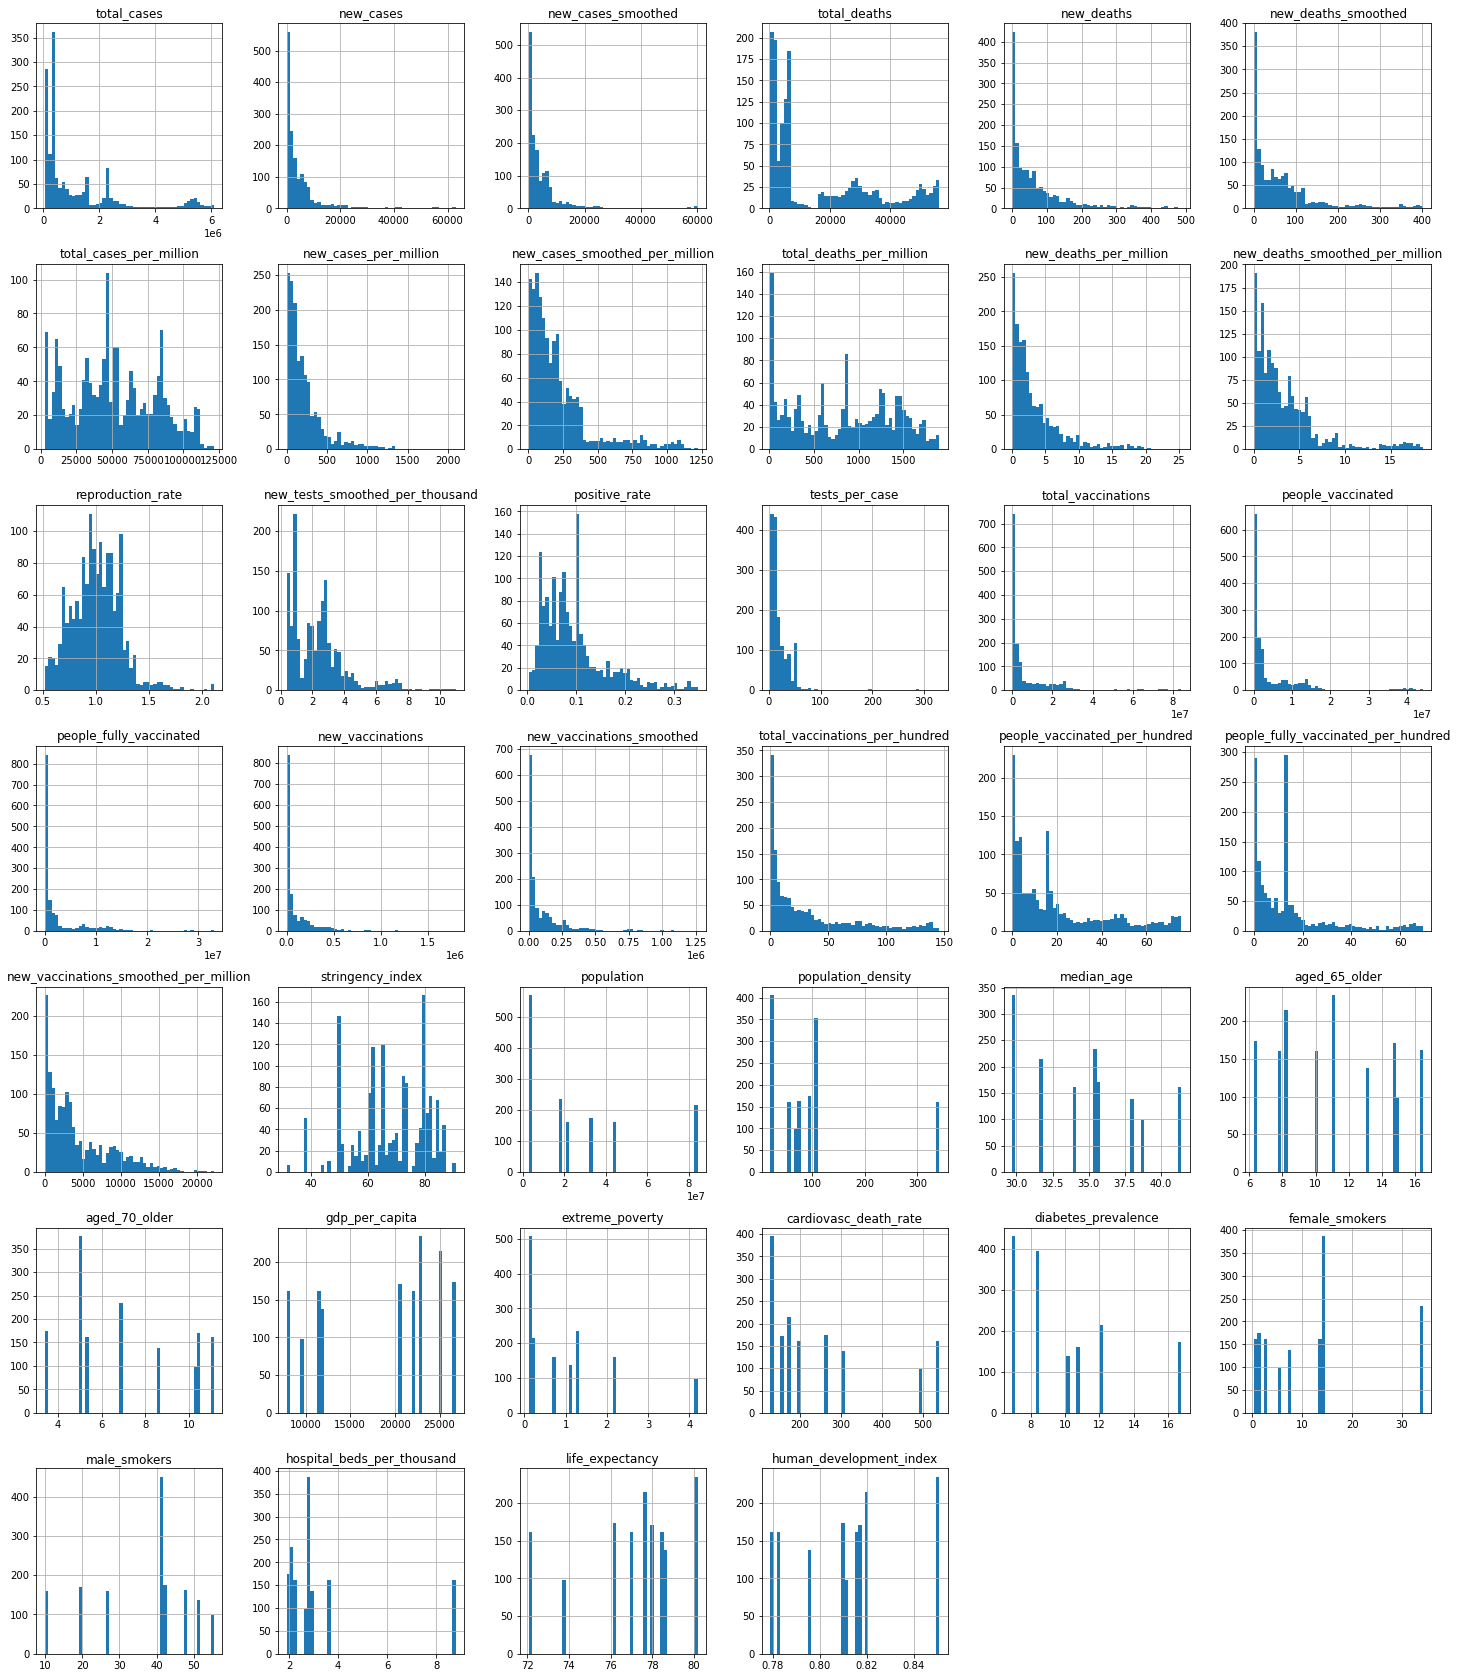

In [296]:
after_vacc_data_new.hist(bins=50,figsize = (25,30))
plt.show()

In [297]:
after_vacc_data_new.drop(['iso_code','continent','location','date'],axis=1,inplace=True)

In [298]:
after_vacc_data_new.drop('tests_units',axis=1,inplace=True)

In [299]:
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [300]:
from sklearn.model_selection import train_test_split

In [301]:
x_train,x_test,y_train,y_test=train_test_split(after_vacc_data_new.loc[:, after_vacc_data_new.columns != 'new_cases'],after_vacc_data_new.new_cases,test_size=0.2,random_state=1)

In [302]:
x_train.drop('new_vaccinations_smoothed',axis=1,inplace=True)
x_test.drop('new_vaccinations_smoothed',axis=1,inplace=True)


# Outlier removal using isolation forest algorithm-

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import dabl


In [305]:
after_vacc_data_new.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1411,63595.0,562.0,593.857,1241.0,8.0,6.857,22098.478,195.288,206.358,431.232,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1413,64627.0,656.0,620.571,1252.0,5.0,6.000,22457.085,227.952,215.641,435.055,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1414,65334.0,707.0,618.000,1256.0,4.0,5.571,22702.759,245.674,214.747,436.445,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1415,65994.0,660.0,612.714,1261.0,5.0,5.429,22932.101,229.342,212.911,438.182,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1416,66635.0,641.0,608.143,1265.0,4.0,5.000,23154.841,222.740,211.322,439.572,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795


Target looks like regression
Showing only top 10 of 38 continuous features


C:\Users\verma\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column new_vaccinations.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\verma\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\verma\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\verma\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[array([[<AxesSubplot:title={'center':'F=3.38E+04'}, xlabel='new_cases_smoothed', ylabel='new_cases'>,
         <AxesSubplot:title={'center':'F=1.19E+03'}, xlabel='new_deaths'>,
         <AxesSubplot:title={'center':'F=1.05E+03'}, xlabel='new_deaths_smoothed'>,
         <AxesSubplot:title={'center':'F=7.25E+02'}, xlabel='total_cases'>,
         <AxesSubplot:title={'center':'F=3.23E+02'}, xlabel='people_fully_vacc...'>],
        [<AxesSubplot:title={'center':'F=3.20E+02'}, xlabel='total_vaccinations', ylabel='new_cases'>,
         <AxesSubplot:title={'center':'F=3.12E+02'}, xlabel='people_vaccinated'>,
         <AxesSubplot:title={'center':'F=2.97E+02'}, xlabel='new_vaccinations_...'>,
         <AxesSubplot:title={'center':'F=2.48E+02'}, xlabel='total_deaths'>,
         <AxesSubplot:title={'center':'F=2.36E+02'}, xlabel='new_vaccinations'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.63E-01'}, xlabel='new_cases', ylabel='population'>]],
       dtype=object)]

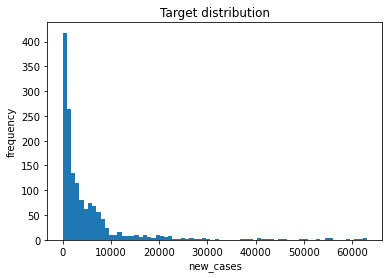

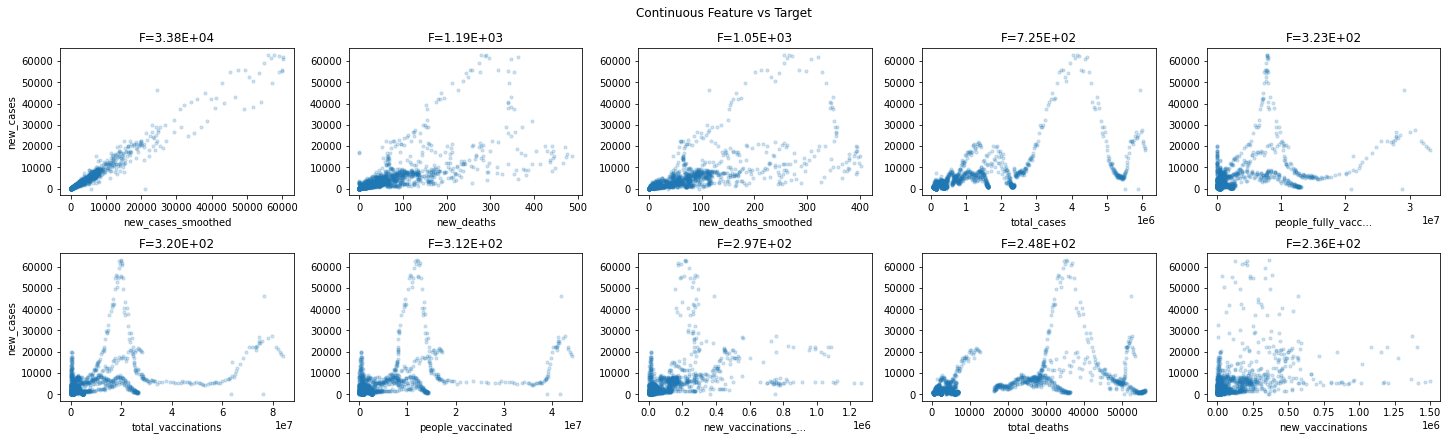

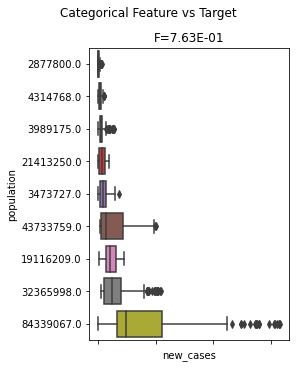

In [306]:
dabl.plot(after_vacc_data_new, target_col = "new_cases")

C:\Users\verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


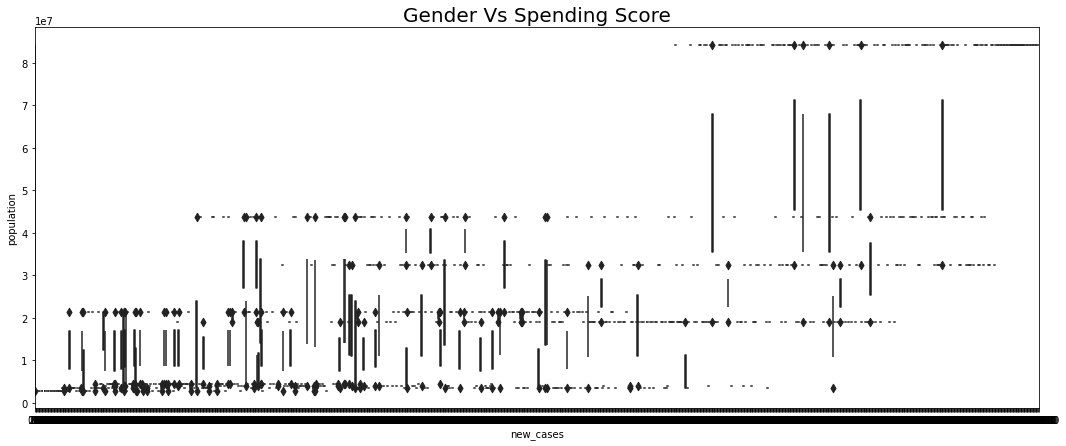

In [307]:
plt.rcParams['figure.figsize'] = (18,7)
sns.boxenplot(after_vacc_data_new['new_cases'], after_vacc_data_new['population'], palette = 'Blues')
plt.title('Gender Vs Spending Score', fontsize = 20)
plt.show()

In [308]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
from sklearn import model_selection


In [309]:
model = IsolationForest(random_state=47)

param_grid = {'n_estimators': [1000, 1500], 
              'max_samples': [10], 
              'contamination': ['auto', 0.0001, 0.0002], 
              'max_features': [10, 15], 
              'bootstrap': [True], 
              'n_jobs': [-1]}

grid_search = model_selection.GridSearchCV(model, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=10, 
                                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=IsolationForest(random_state=47),
             param_grid={'bootstrap': [True],
                         'contamination': ['auto', 0.0001, 0.0002],
                         'max_features': [10, 15], 'max_samples': [10],
                         'n_estimators': [1000, 1500], 'n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [310]:
iforest = IsolationForest(bootstrap=True,
                          contamination=0.0001, 
                          max_features=15, 
                          max_samples=10, 
                          n_estimators=1500, 
                          n_jobs=-1,
                         random_state=1)
y_pred = iforest.fit_predict(x_train)

In [311]:
X_train_iforest, y_train_iforest = x_train.loc[(y_pred != -1), :], y_train.loc[(y_pred != -1)]

# XGBoost algorithm-

In [312]:

def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                            n_iter=5,
                           cv = 3,
                           n_jobs = -1,
                                 random_state=1
                           )

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_
#Run only in the first run of the kernel.

In [313]:
best_params=hyperParameterTuning(X_train_iforest,y_train_iforest)

In [314]:
best_params

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [315]:
{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [316]:

xgb_model = XGBRegressor(subsample=0.7,
 objective= 'reg:squarederror',
 n_estimators= 500,
 min_child_weight= 1,
 max_depth= 7,
 learning_rate= 0.01,
 colsample_bytree= 0.7)

In [317]:
xgb_model.fit(X_train_iforest,y_train_iforest)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [318]:
y_pred=xgb_model.predict(x_test)

In [319]:
from sklearn.metrics import mean_squared_error

In [320]:
score=mean_squared_error(y_test,y_pred)
score

1094935.5229413288

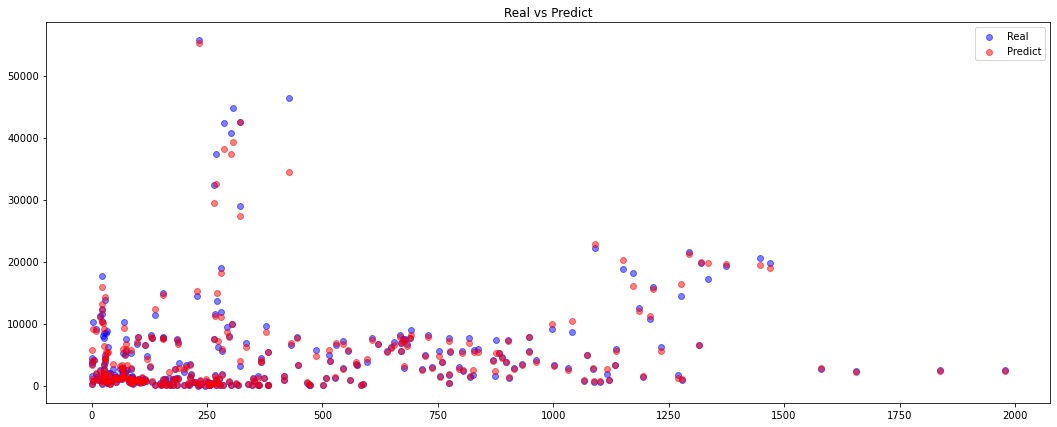

In [321]:
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_test,color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_pred,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

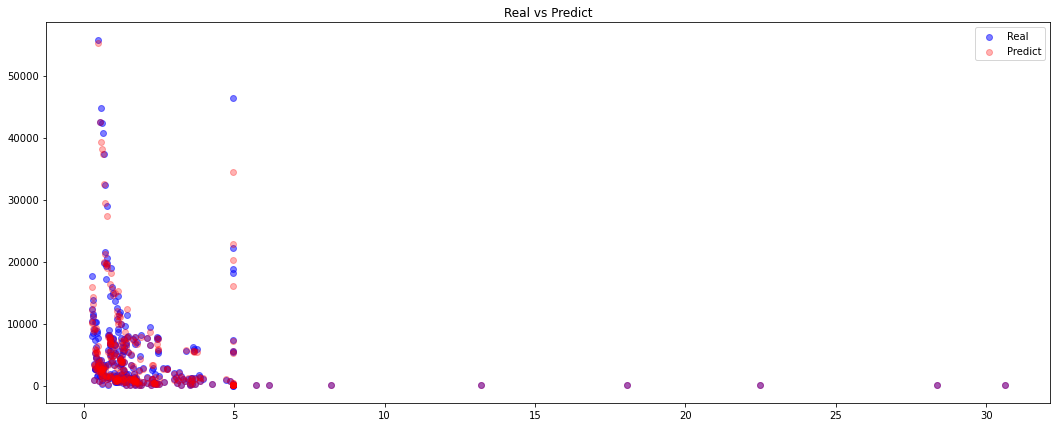

In [322]:
plt.scatter(x_test['tests_per_case'] * 0.092903, y_test,          color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['tests_per_case'] * 0.092903, y_pred,  color='red' , label='Predict', alpha=0.3)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

# Support vector machine

In [323]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'sigmoid')
regressor.fit(X_train_iforest, y_train_iforest)

SVR(kernel='sigmoid')

In [324]:
y_pred1=regressor.predict(x_test)
score_svm=mean_squared_error(y_test,y_pred1)

In [325]:
score

1094935.5229413288

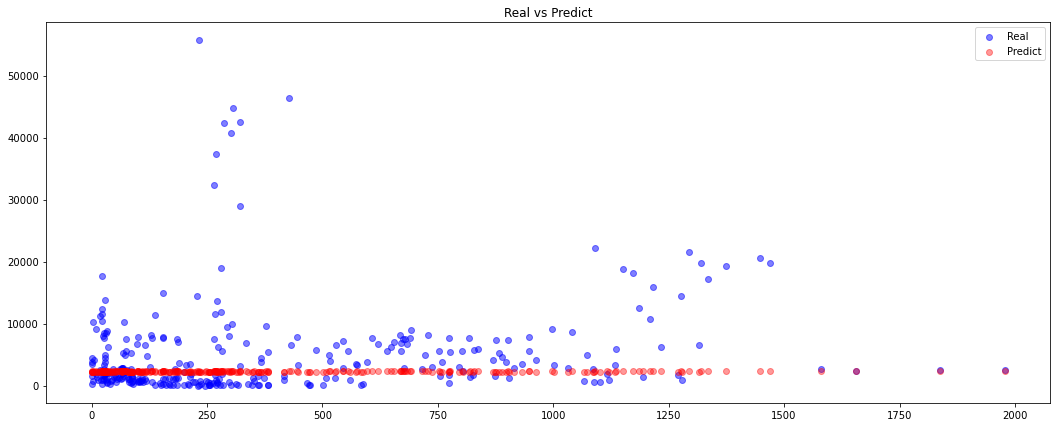

In [326]:
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_test,color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_pred1,  color='red' , label='Predict', alpha=0.4)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

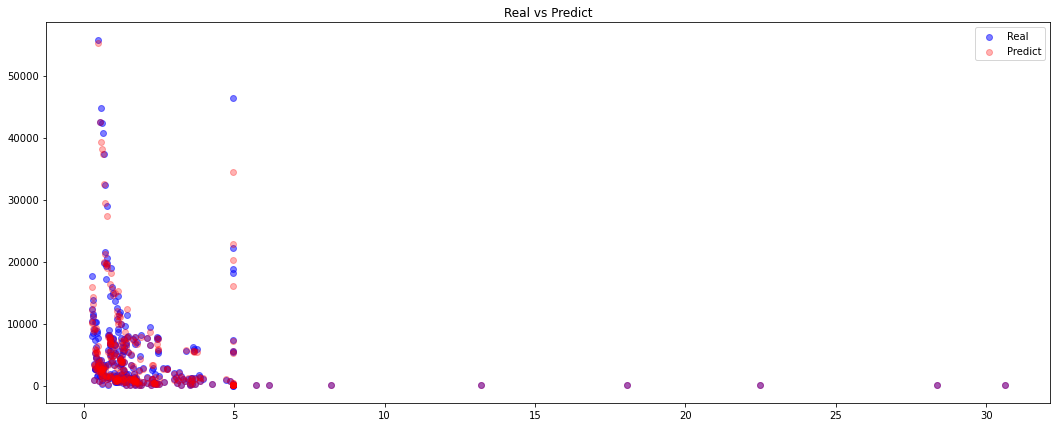

In [327]:
plt.scatter(x_test['tests_per_case'] * 0.092903, y_test,          color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['tests_per_case'] * 0.092903, y_pred,  color='red' , label='Predict', alpha=0.3)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

# Lasso Regression implementation-

In [328]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso

In [329]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_iforest, y_train_iforest)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842525984.8280154, tolerance: 8873192.892529259
  model = cd_fast.enet_coordinate_descent(


In [330]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -650.031
Config: {'alpha': 0.99}


In [331]:
from sklearn.linear_model import Lasso

In [332]:
model = Lasso(alpha=0.99)
model.fit(X_train_iforest,y_train_iforest)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842525984.8280154, tolerance: 8873192.892529259
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.99)

In [333]:
y_pred_lasso=model.predict(x_test)
score_lasso=mean_squared_error(y_pred_lasso,y_test)

In [334]:
score_lasso

2062358.3785437036

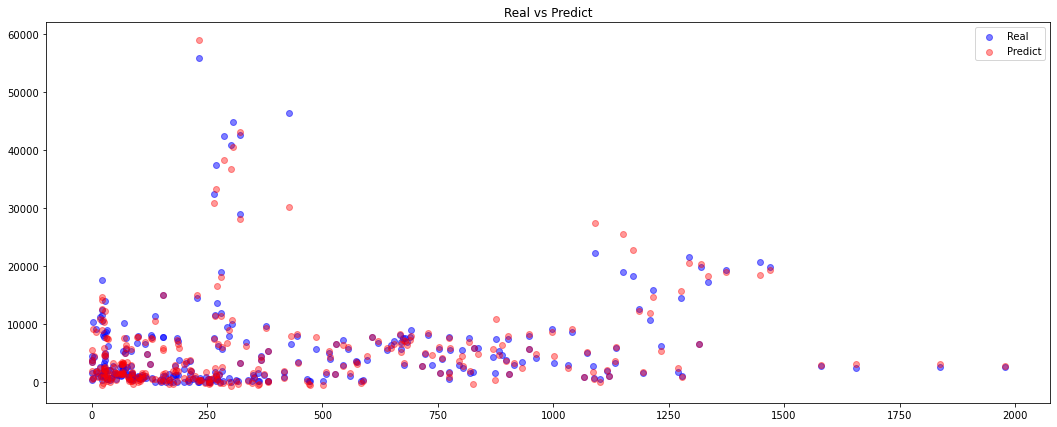

In [335]:
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_test,color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_pred_lasso,  color='red' , label='Predict', alpha=0.4)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

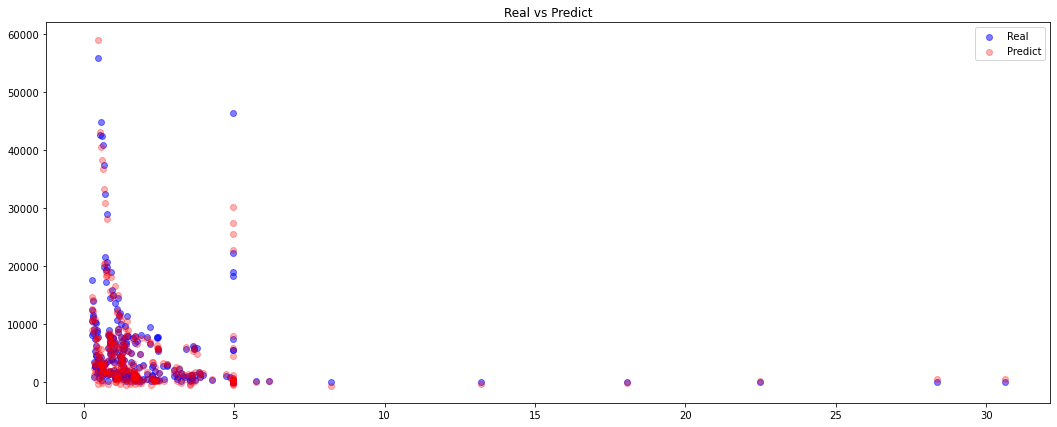

In [336]:
plt.scatter(x_test['tests_per_case'] * 0.092903, y_test,          color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['tests_per_case'] * 0.092903, y_pred_lasso,  color='red' , label='Predict', alpha=0.3)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

# LightGBM

In [338]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = LGBMRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_iforest, y_train_iforest, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -391.404 (84.297)


In [339]:
model.fit(X_train_iforest,y_train_iforest)
y_pred_lightgbm=model.predict(x_test)


In [340]:
score_lightgbm=mean_squared_error(y_pred_lightgbm,y_test)

In [341]:
score_lightgbm

1300260.2009394544

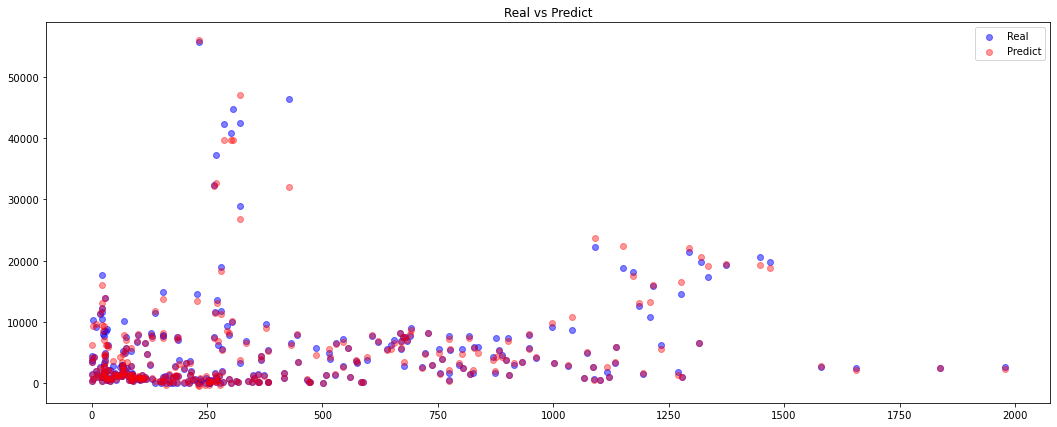

In [342]:
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_test,color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['new_vaccinations_smoothed_per_million'] * 0.092903, y_pred_lightgbm,  color='red' , label='Predict', alpha=0.4)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

In [ ]:
###########################

In [343]:
for cols in after_vacc_data.location.unique():
    if(after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .isnull().sum()<after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .shape[0]*0.8):
        print(cols," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .isnull().sum()," ",after_vacc_data.loc[after_vacc_data.location==cols].new_tests_smoothed_per_thousand .shape[0])

Albania   45   138
Chile   0   234
Georgia   9   98
Malaysia   0   174
Panama   2   161
Sri Lanka   2   161
Turkey   44   215
Ukraine   0   162
Uruguay   2   171


In [344]:

# after_vacc_data.drop(['new_tests','total_tests','new_tests_smoothed','new_tests_smoothed_per_thousand'],axis=1,inplace=True)

In [345]:
for col in after_vacc_data.location.unique():
    after_vacc_data.loc[after_vacc_data.location==cols].reproduction_rate=after_vacc_data.loc[after_vacc_data.location==cols].reproduction_rate.fillna(value=after_vacc_data.loc[after_vacc_data.location==cols].reproduction_rate.mean(),axis=0)
    

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [346]:
after_vacc_data['reproduction_rate'].dtype

dtype('float64')

In [347]:
for cols in after_vacc_data.columns:
    if(after_vacc_data[cols].dtype=='float64' or after_vacc_data[cols].dtype=='int64' ):
        after_vacc_data[cols].fillna(after_vacc_data[cols].mean(),inplace=True)

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [348]:
after_vacc_data.tests_units.fillna('tests performed',axis=0,inplace=True)

In [349]:
for cols in after_vacc_data.location.unique():
    print(cols," ",after_vacc_data.loc[after_vacc_data.location==cols].tests_units.isnull().sum()," ",after_vacc_data.loc[after_vacc_data.location==cols].tests_units.shape[0])

Albania   0   138
Benin   0   8
Brazil   0   184
Chile   0   234
China   0   160
Egypt   0   31
Georgia   0   98
Malaysia   0   174
Oman   0   66
Panama   0   161
Sri Lanka   0   161
Tajikistan   0   15
Turkey   0   215
Ukraine   0   162
Uruguay   0   171


In [350]:
after_vacc_data.drop('date',axis=1,inplace=True)

C:\Users\verma\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [351]:
after_vacc_data.location.unique()


array(['Albania', 'Benin', 'Brazil', 'Chile', 'China', 'Egypt', 'Georgia',
       'Malaysia', 'Oman', 'Panama', 'Sri Lanka', 'Tajikistan', 'Turkey',
       'Ukraine', 'Uruguay'], dtype=object)

In [352]:
after_vacc_data.to_csv('after_vaccination_data1.csv',index=False)

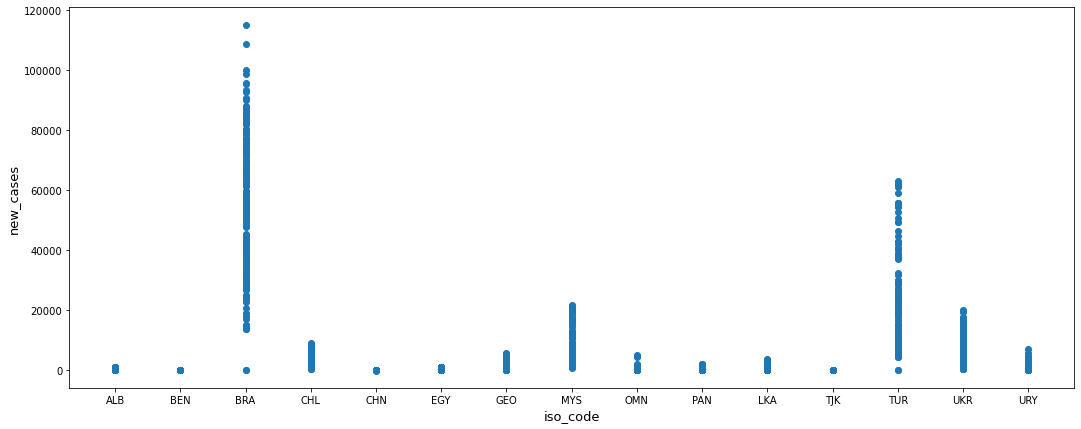

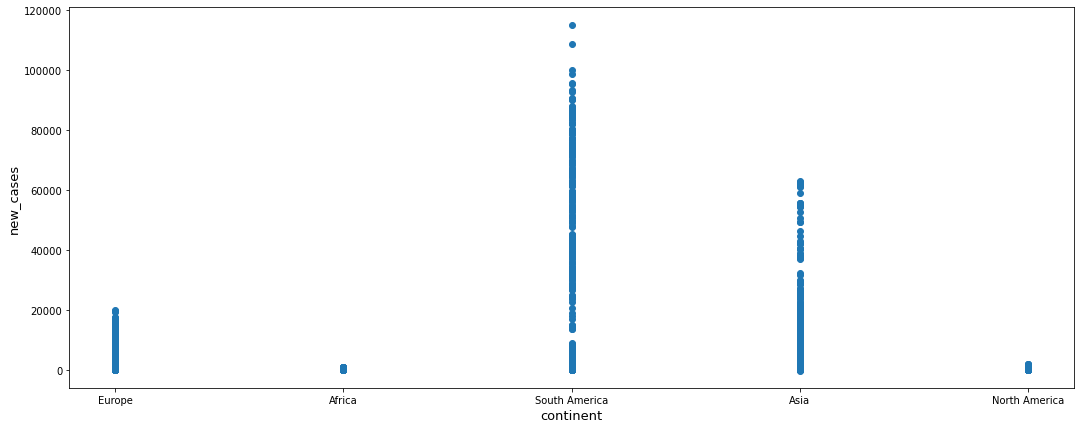

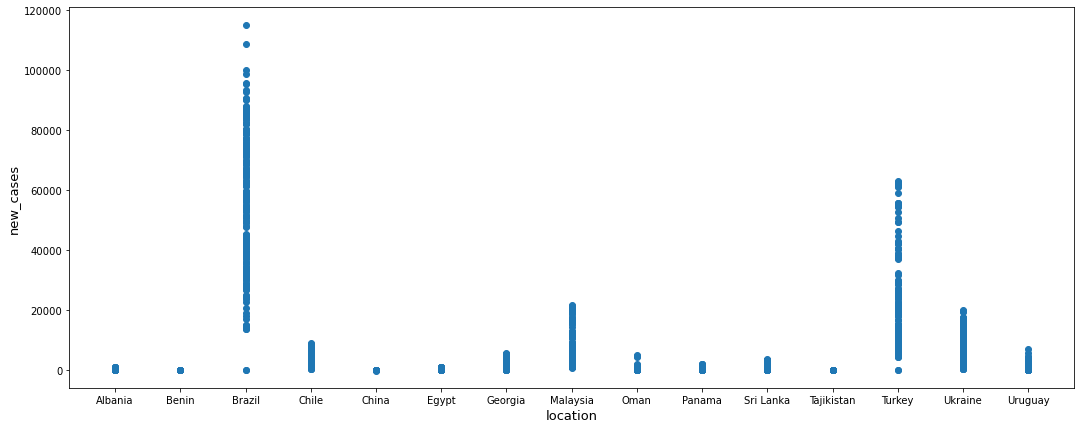

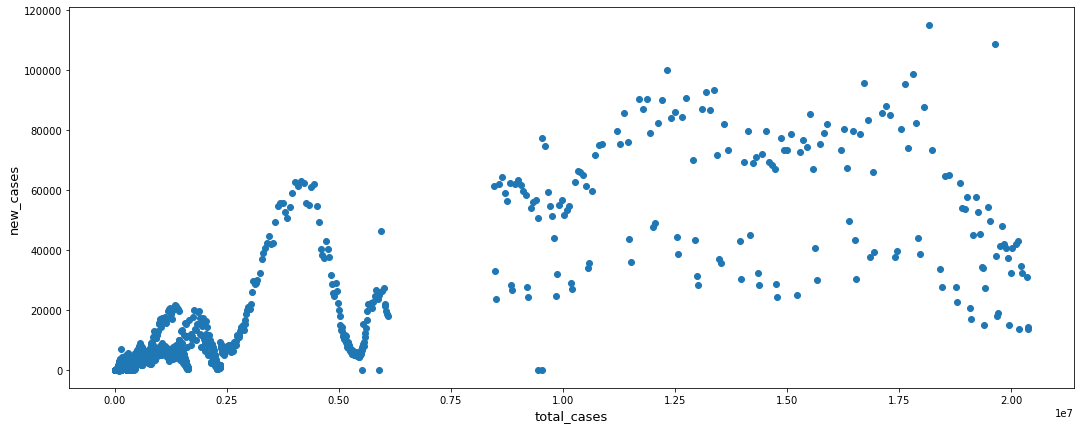

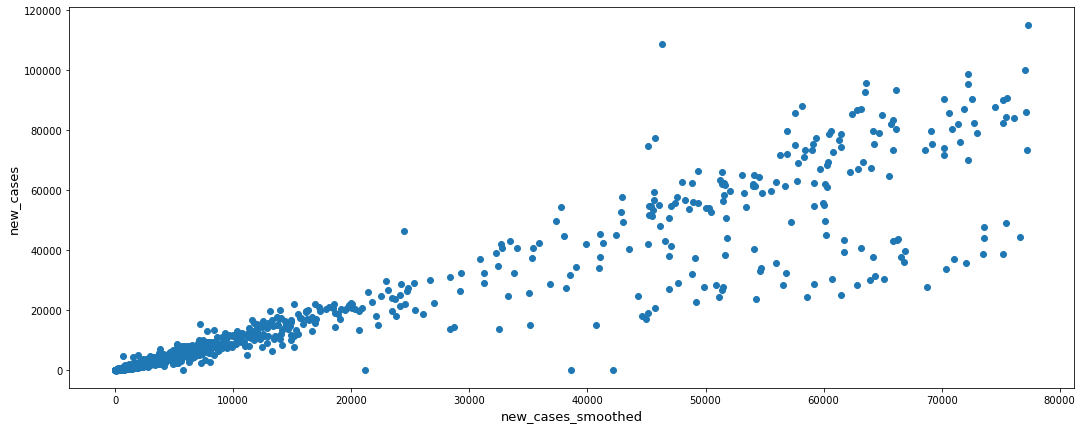

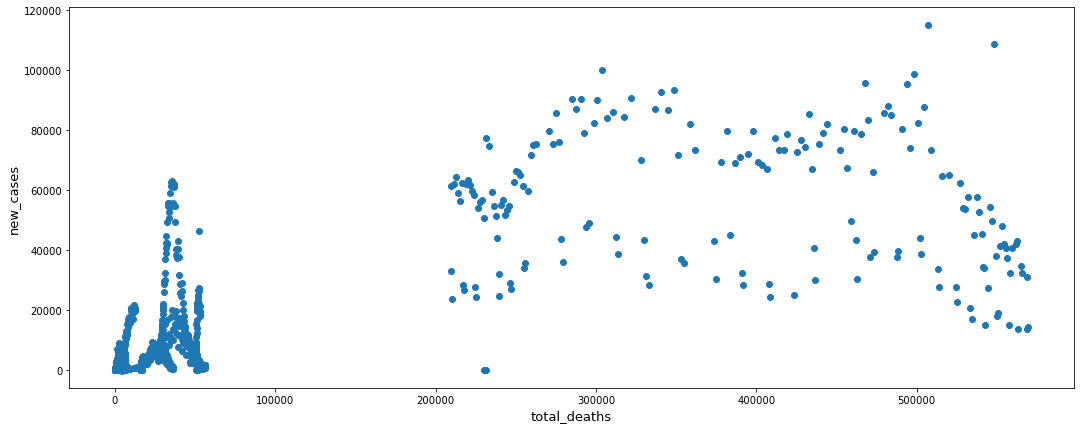

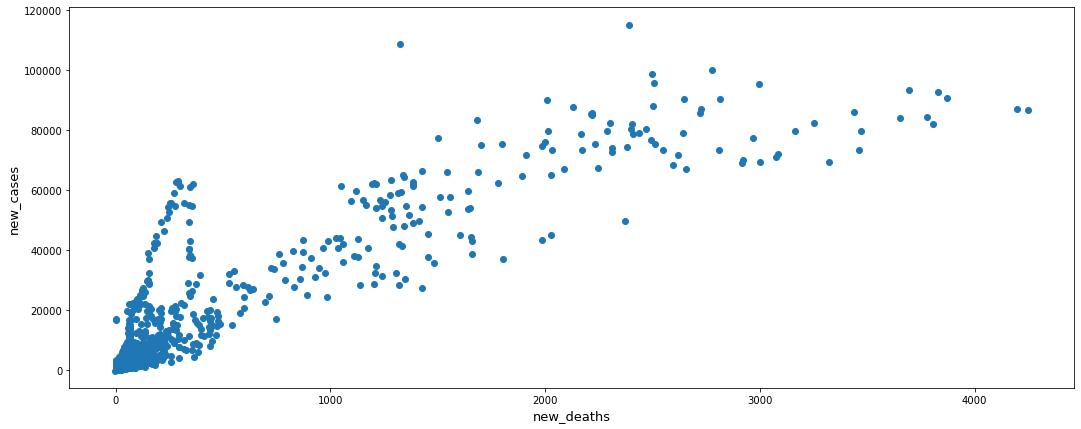

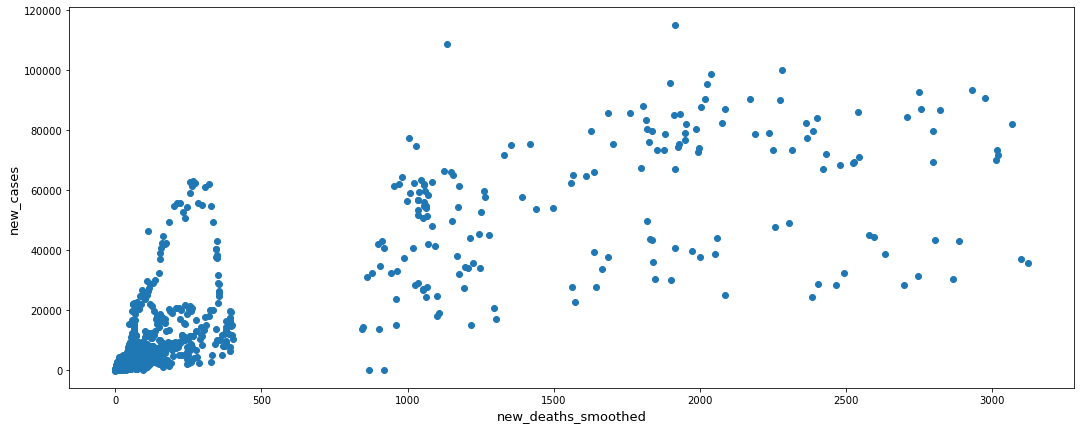

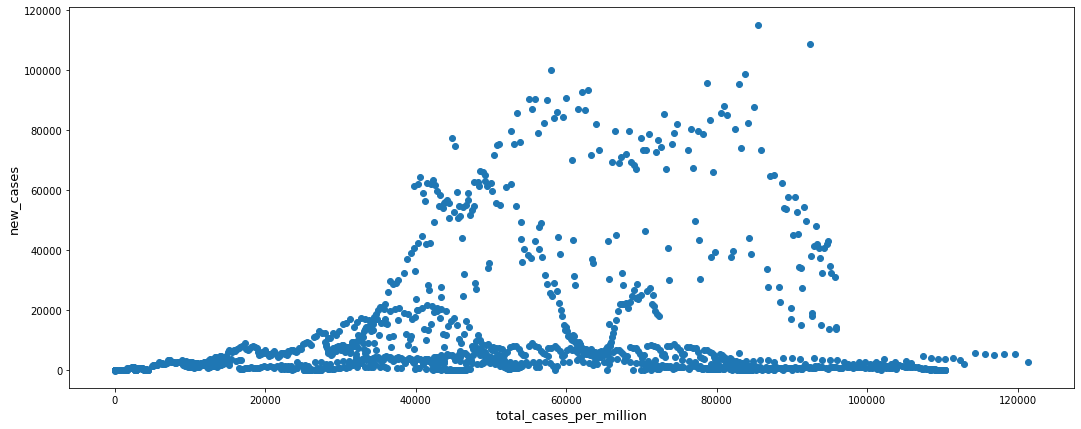

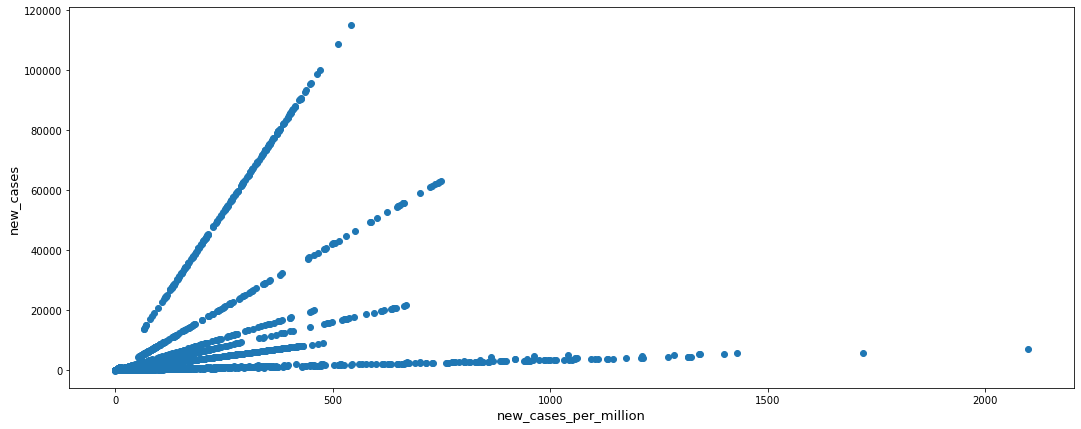

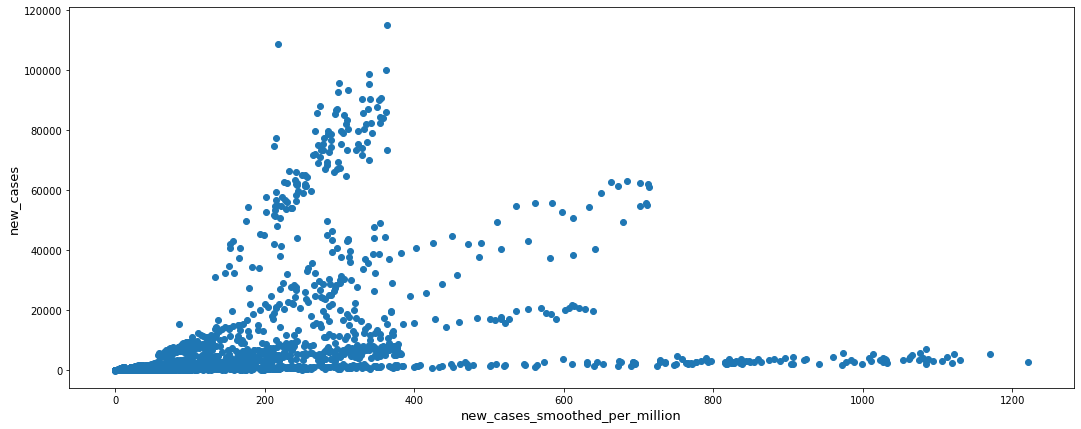

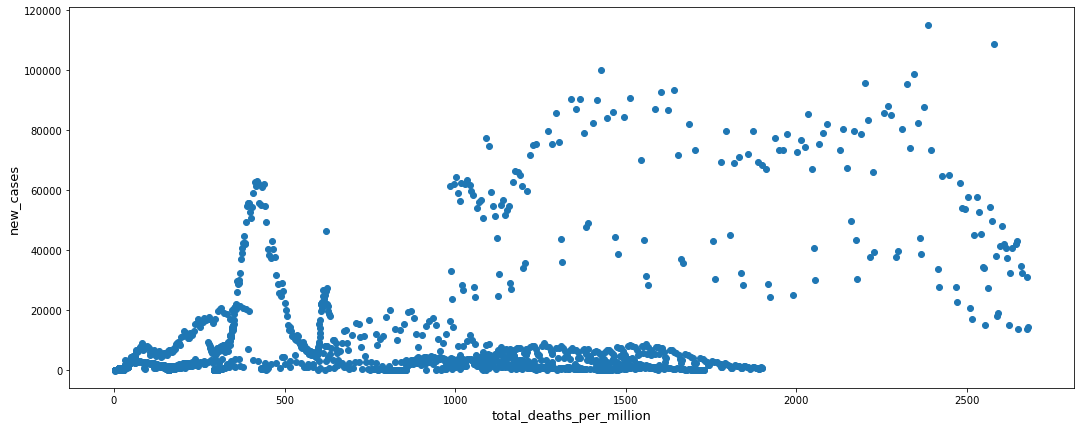

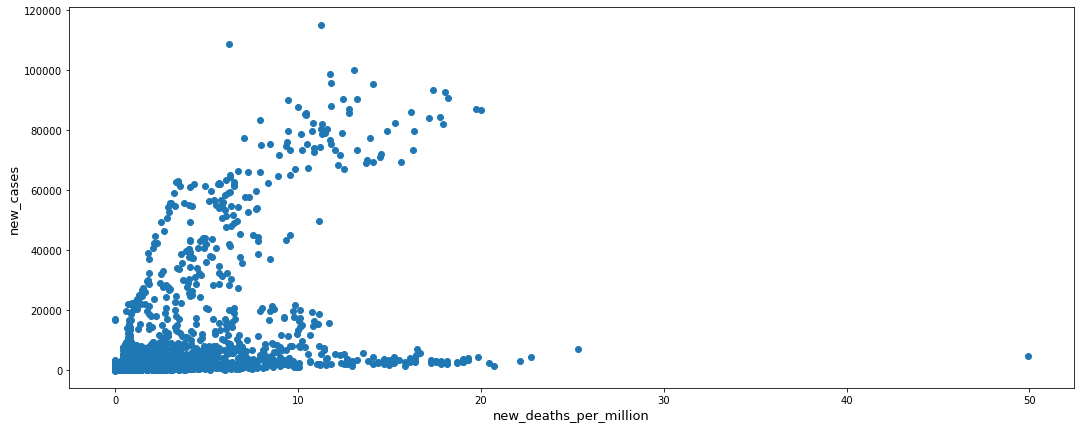

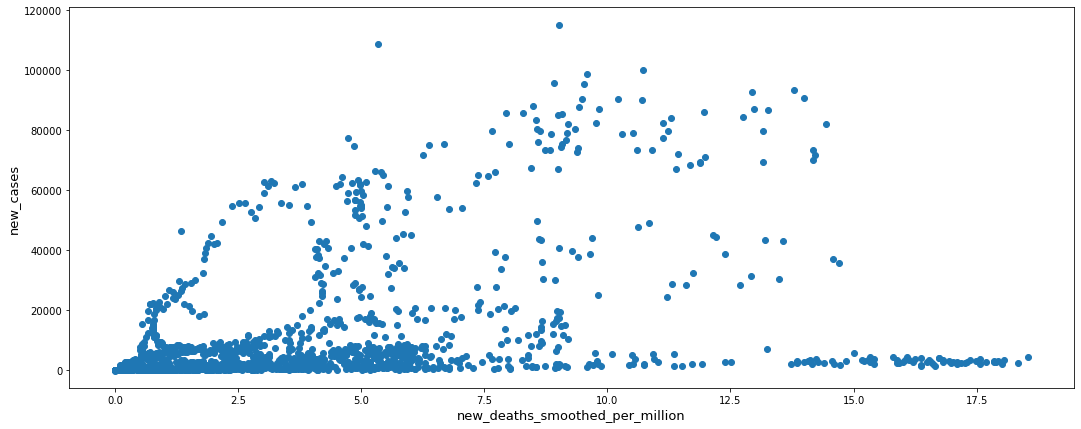

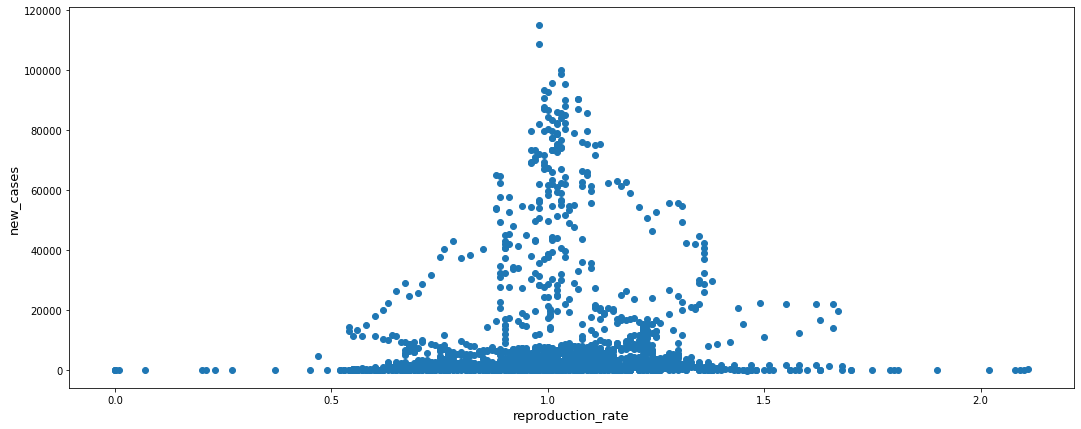

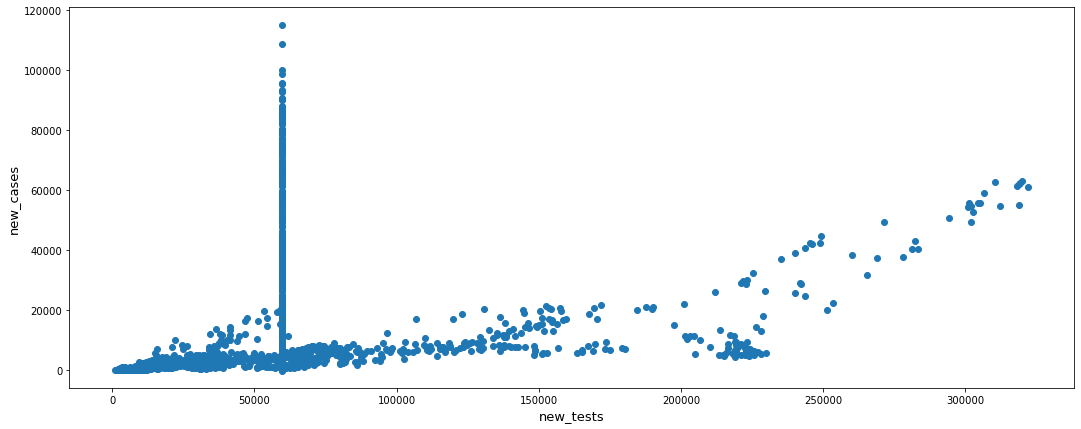

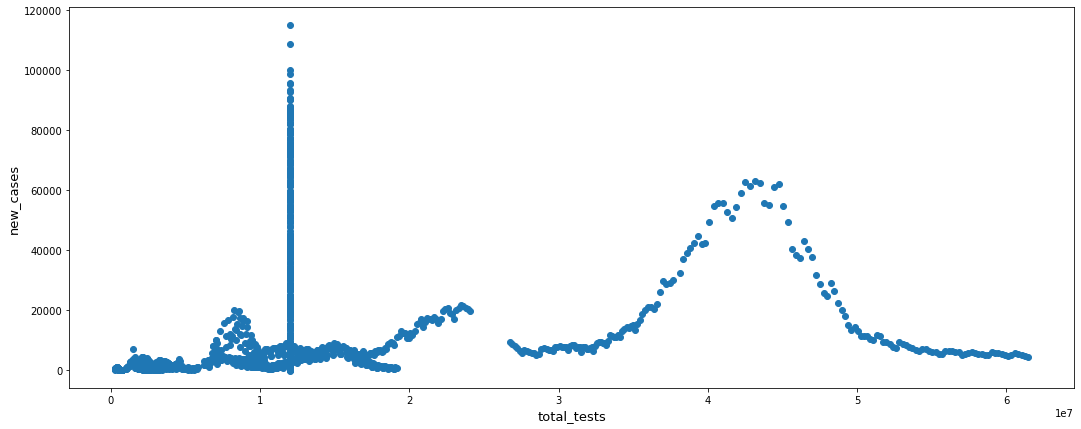

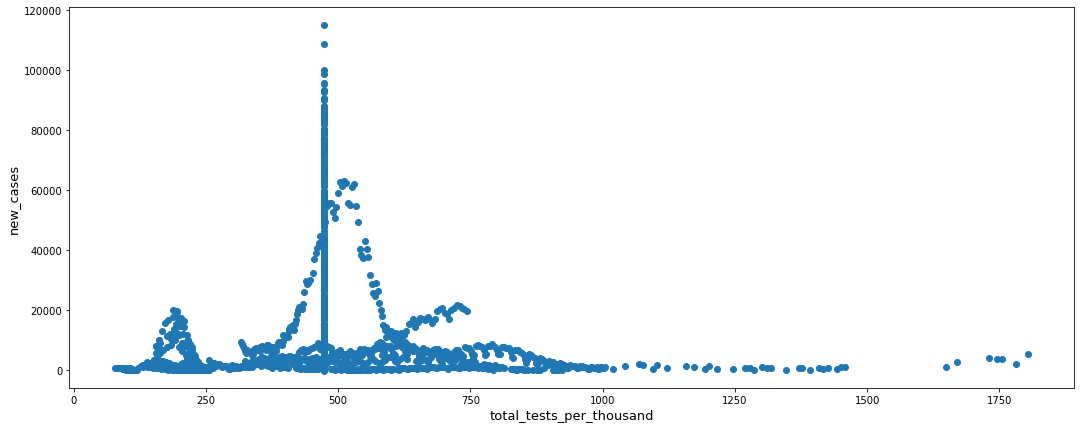

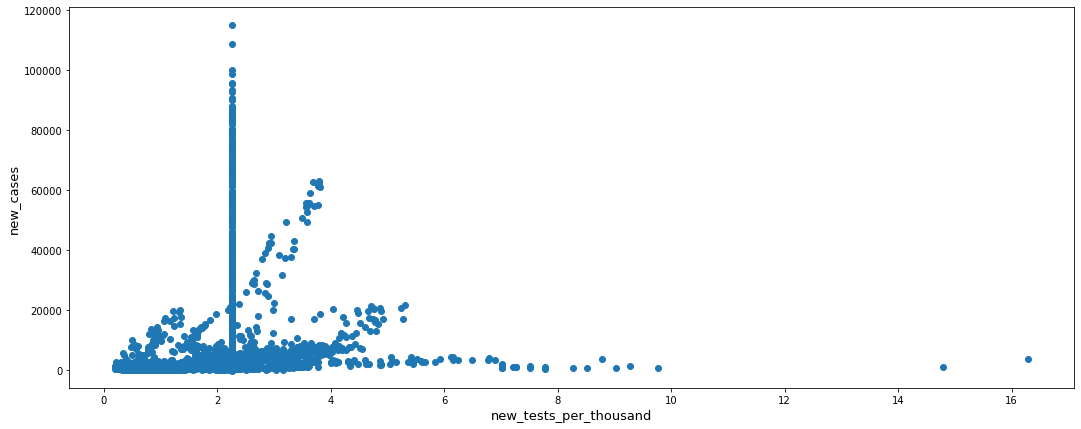

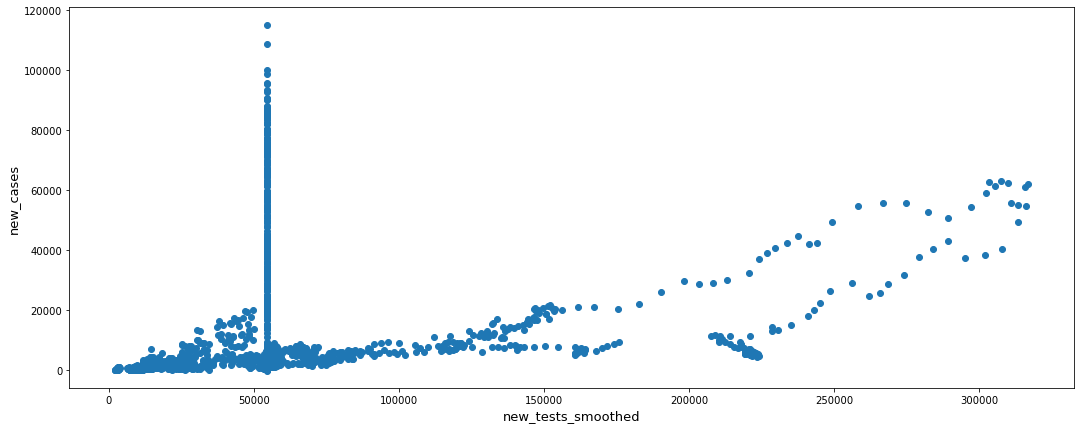

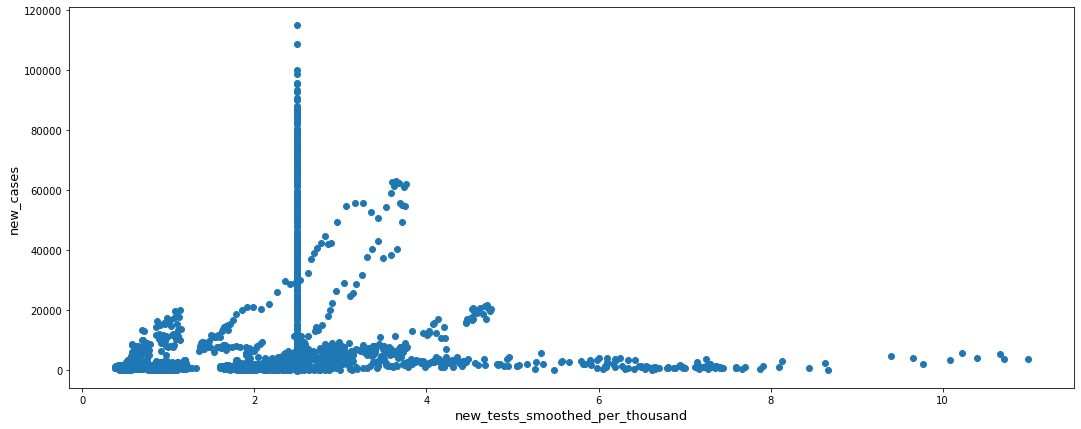

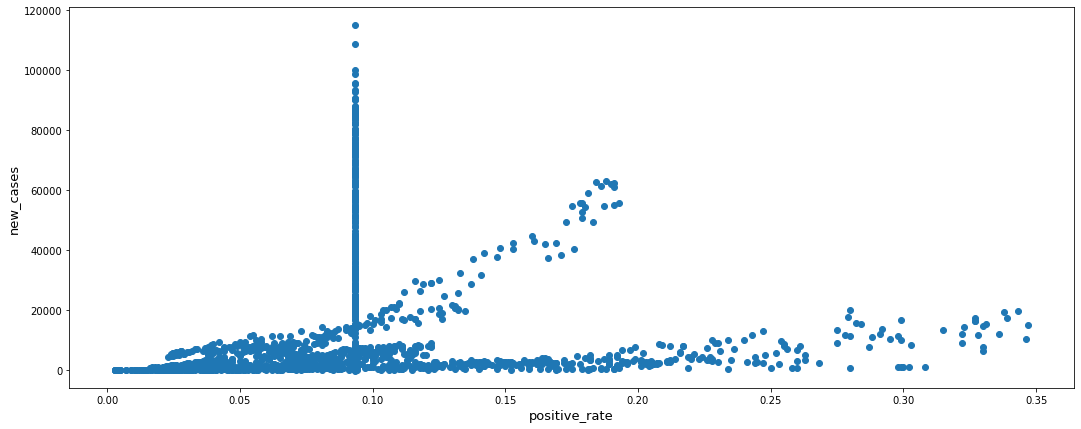

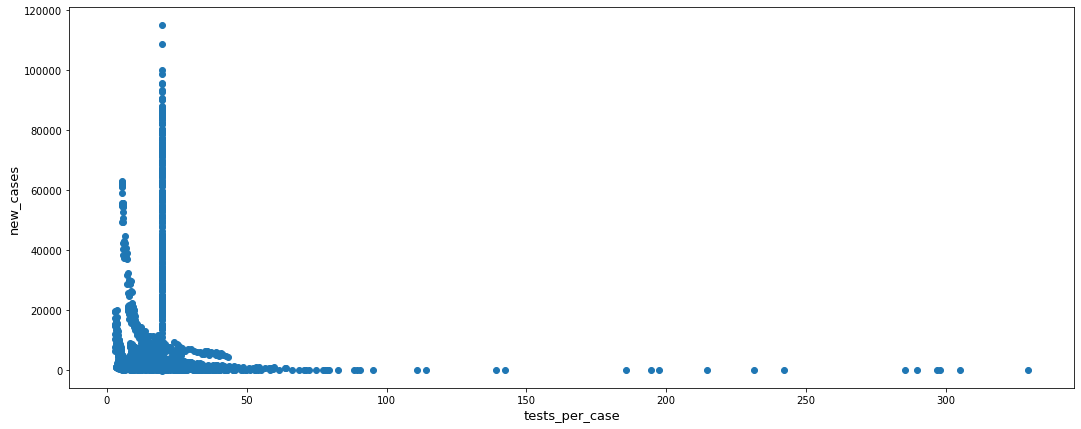

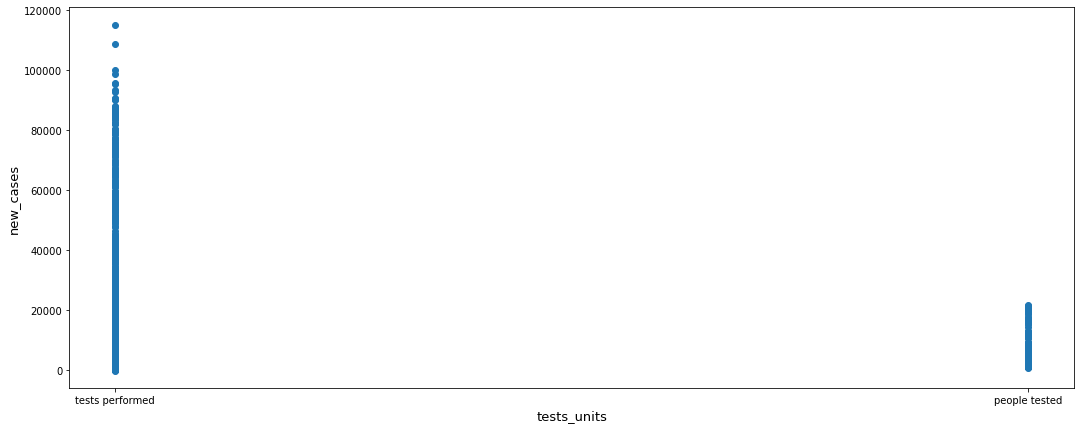

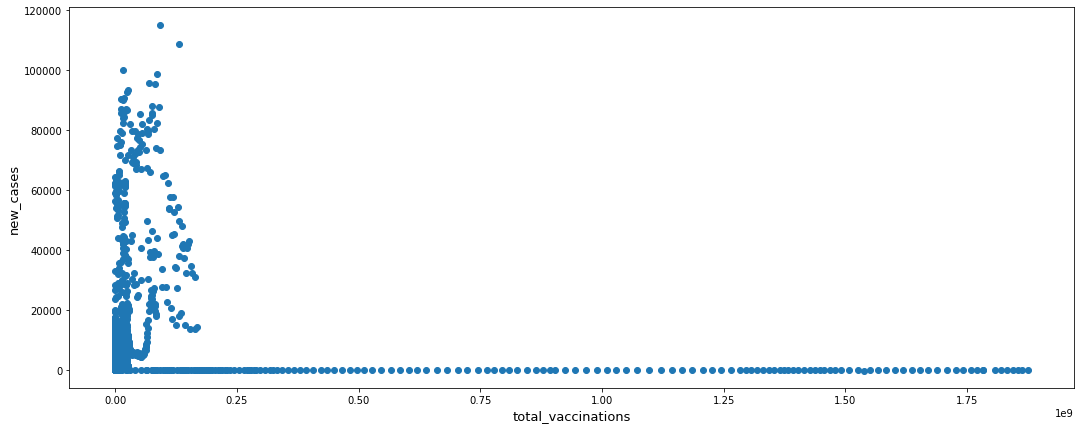

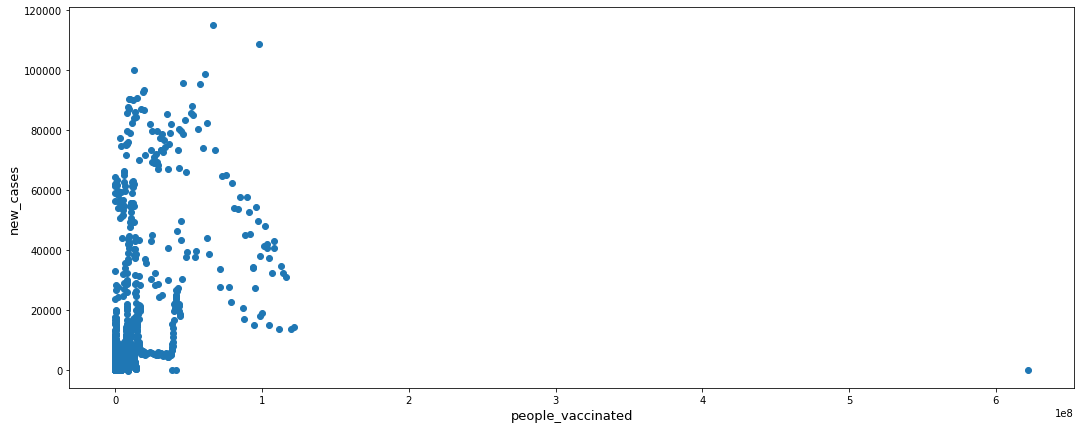

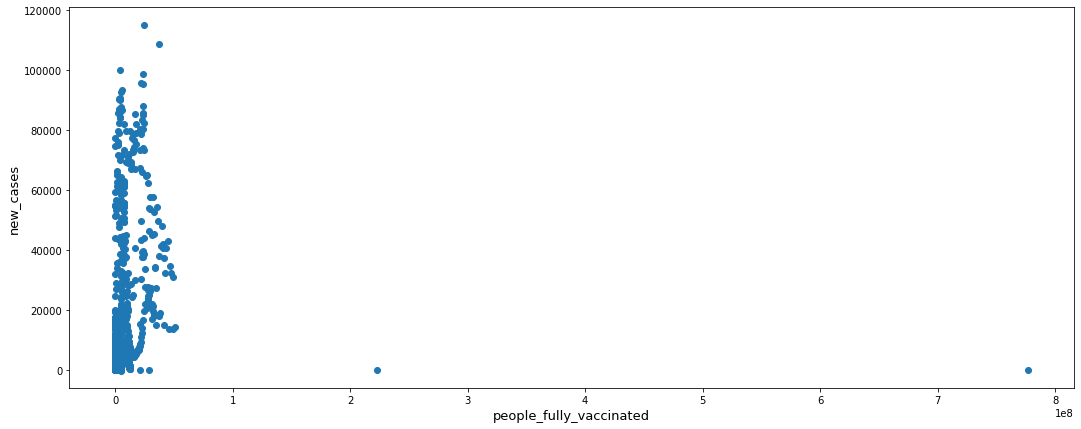

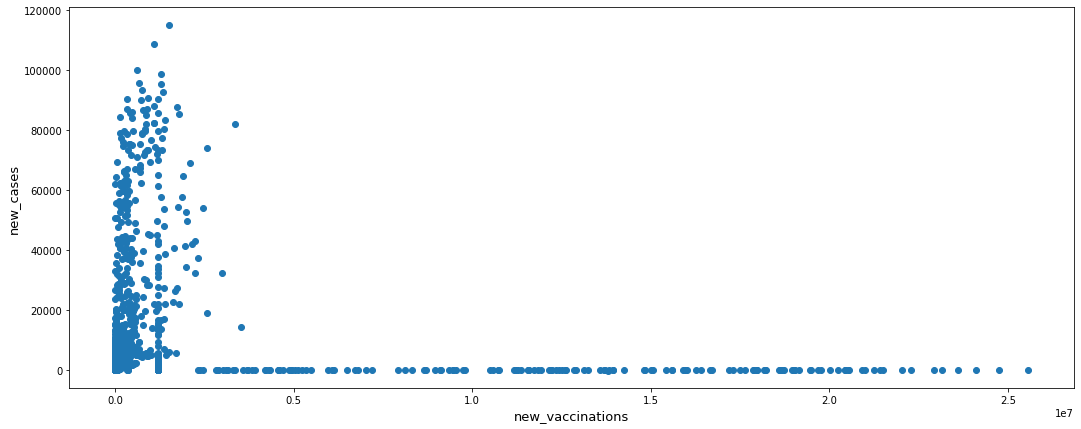

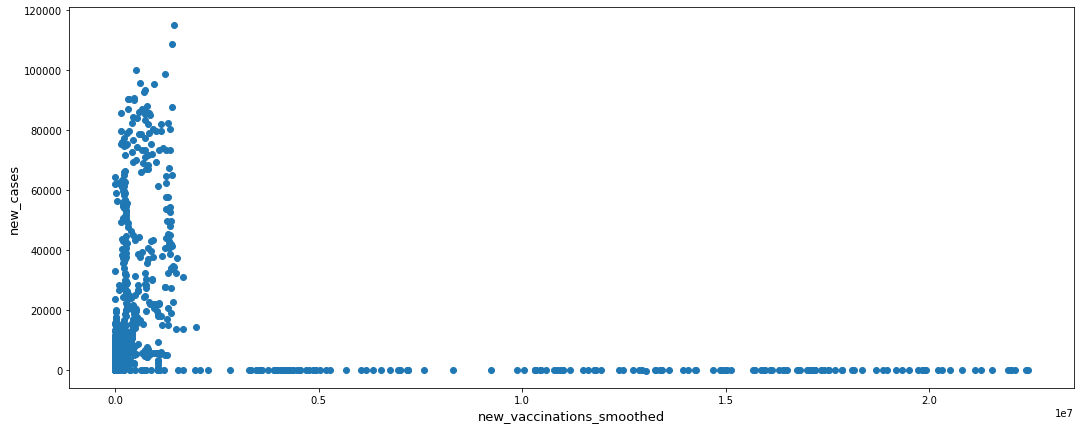

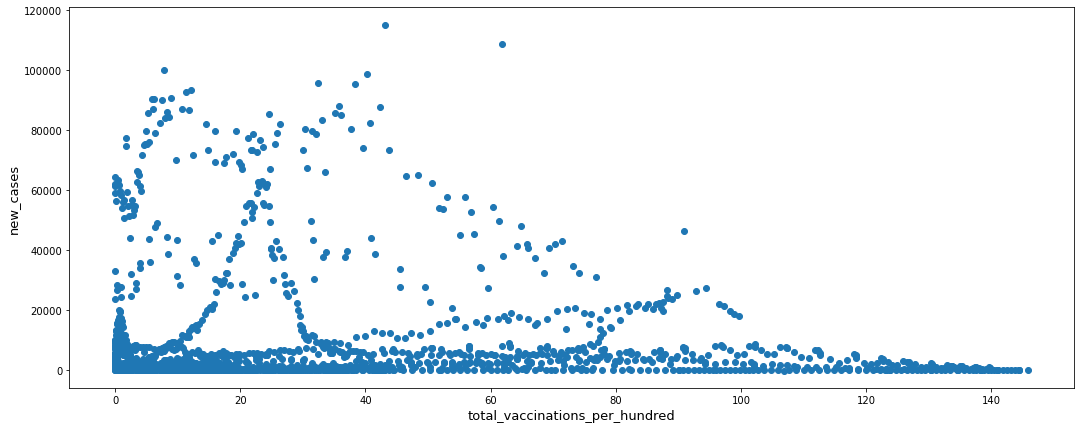

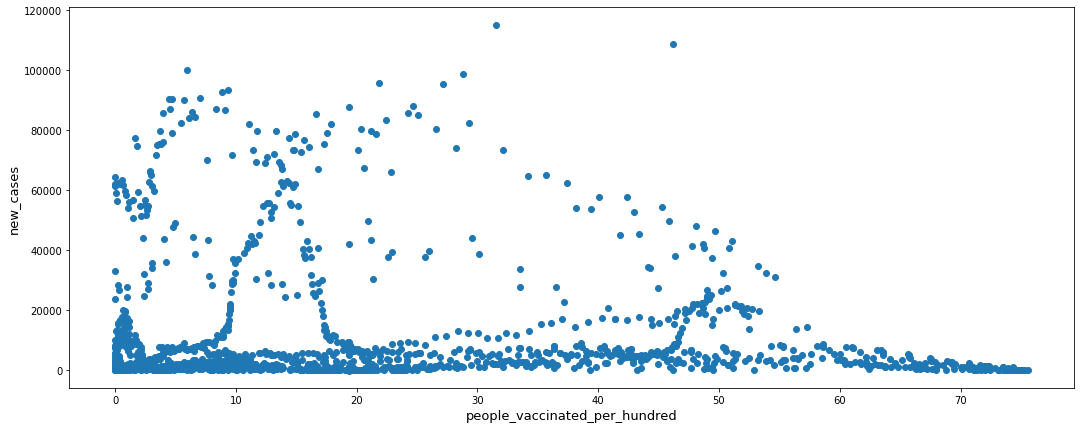

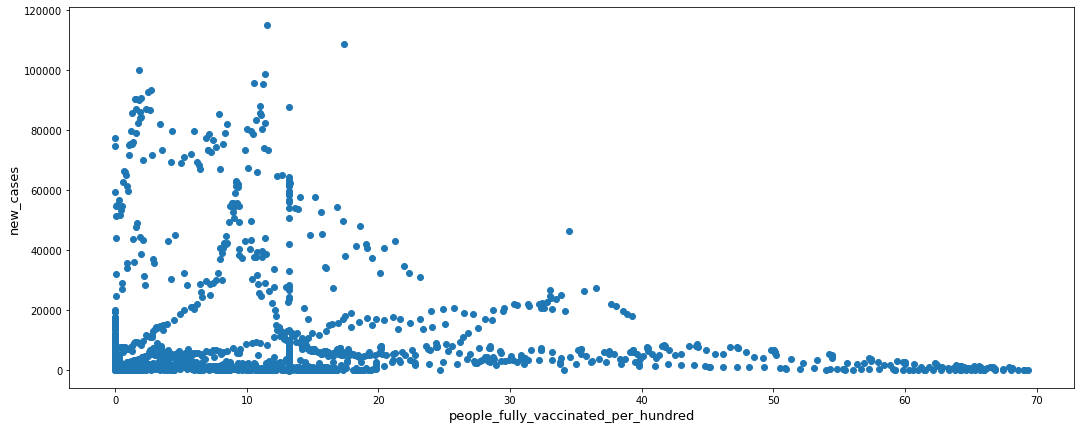

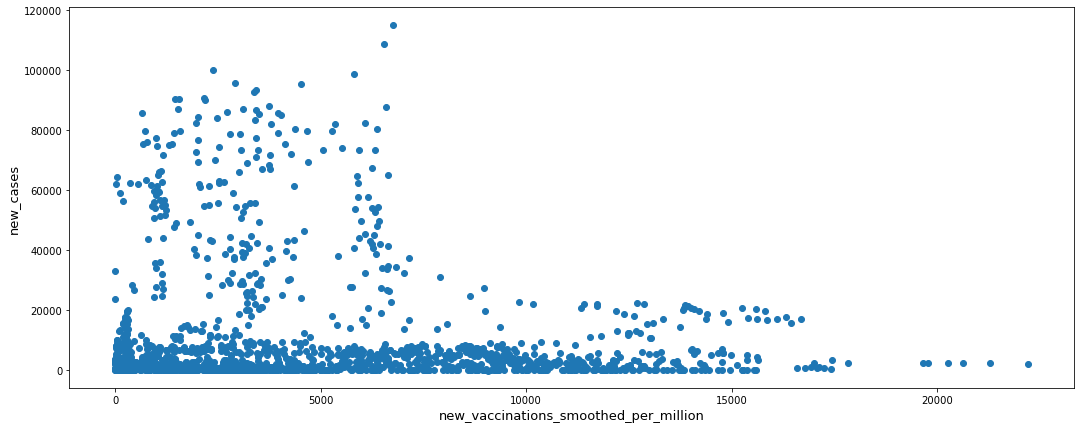

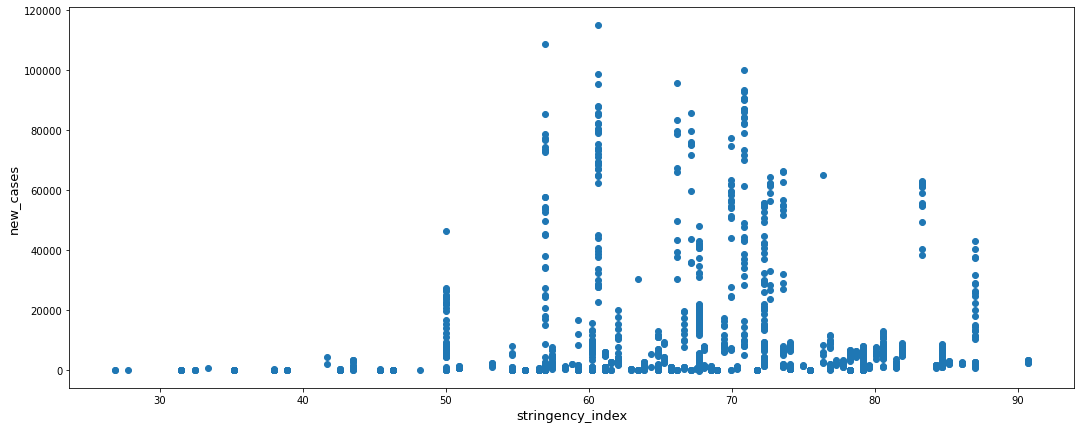

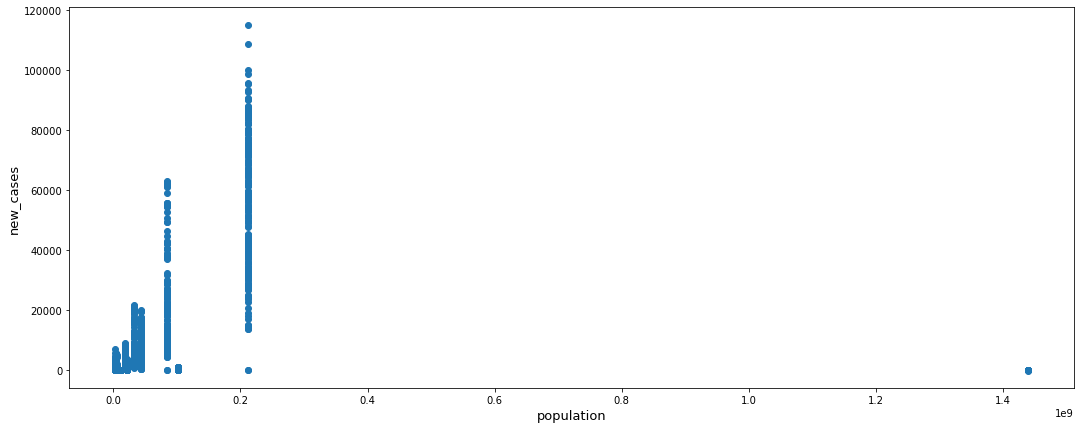

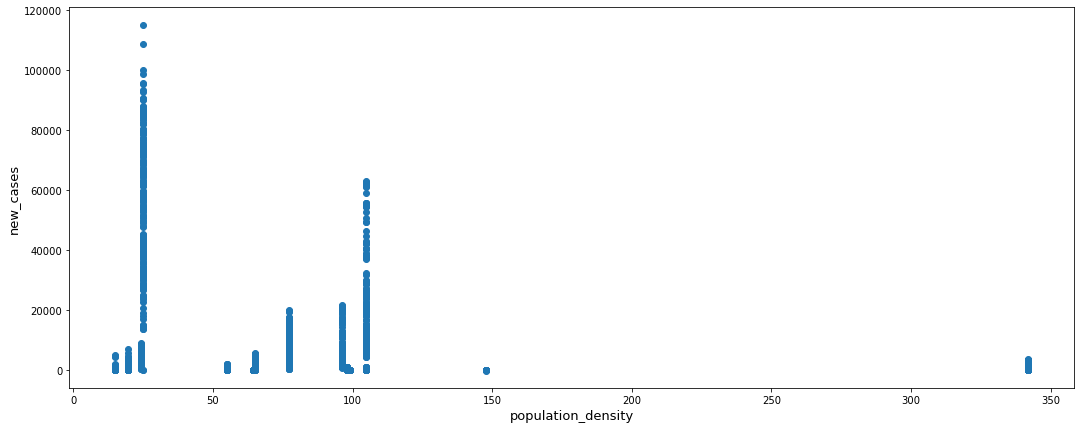

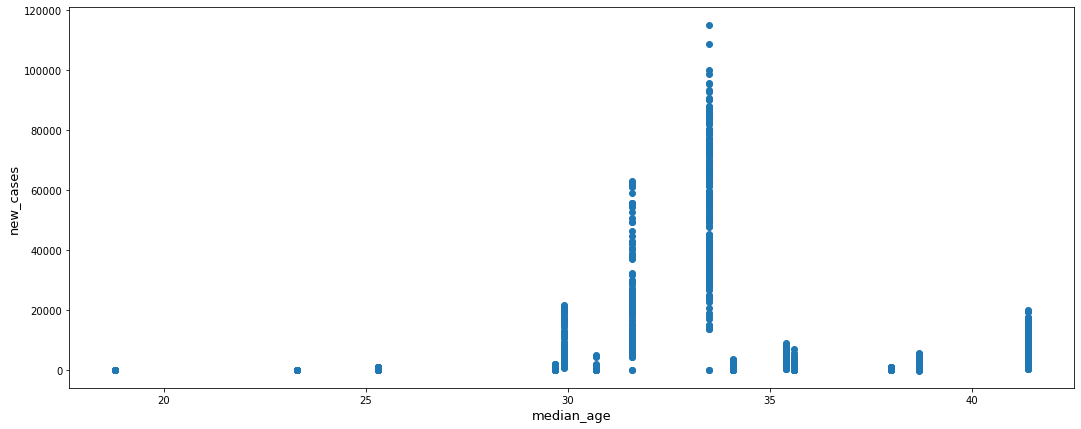

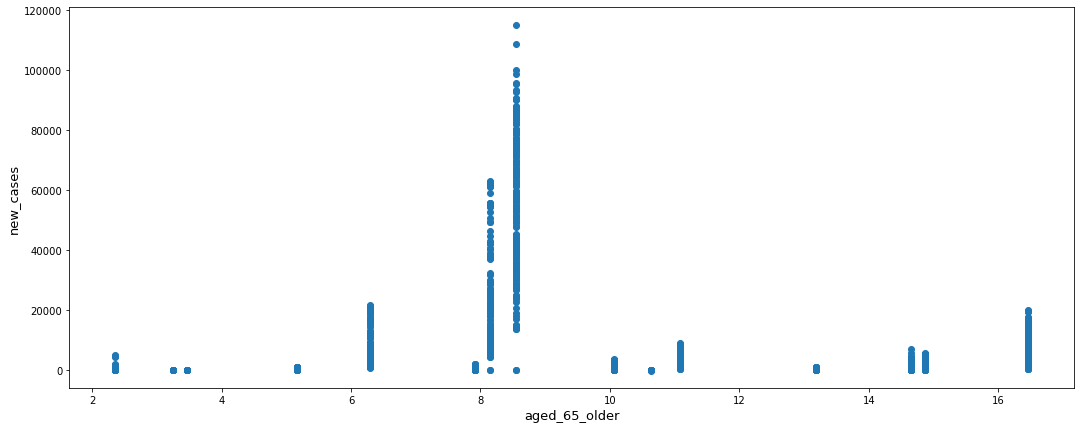

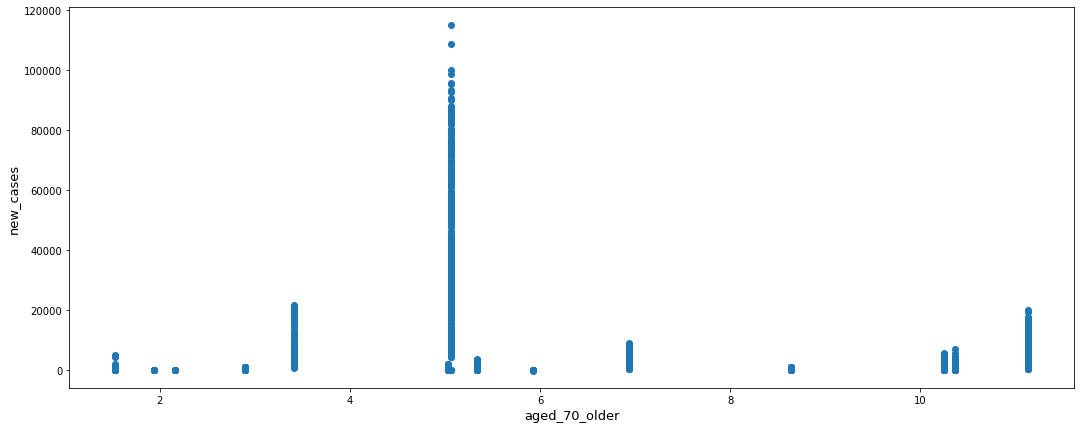

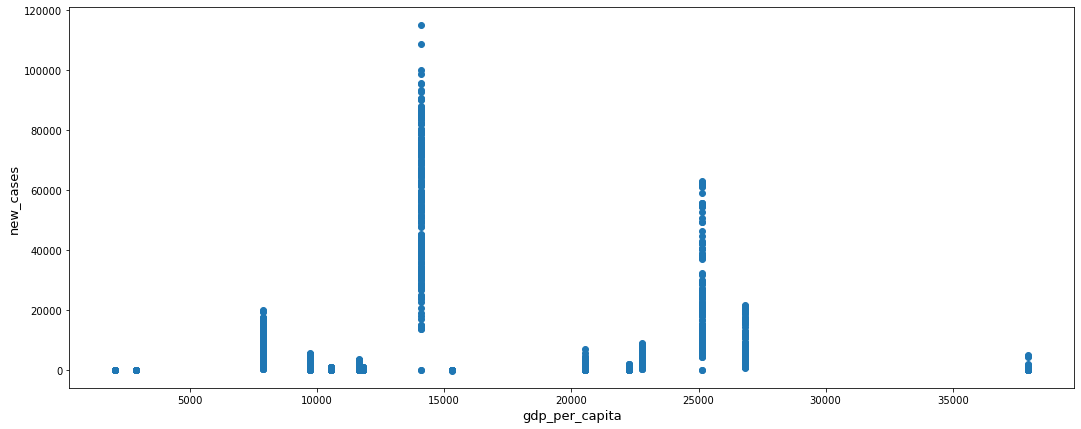

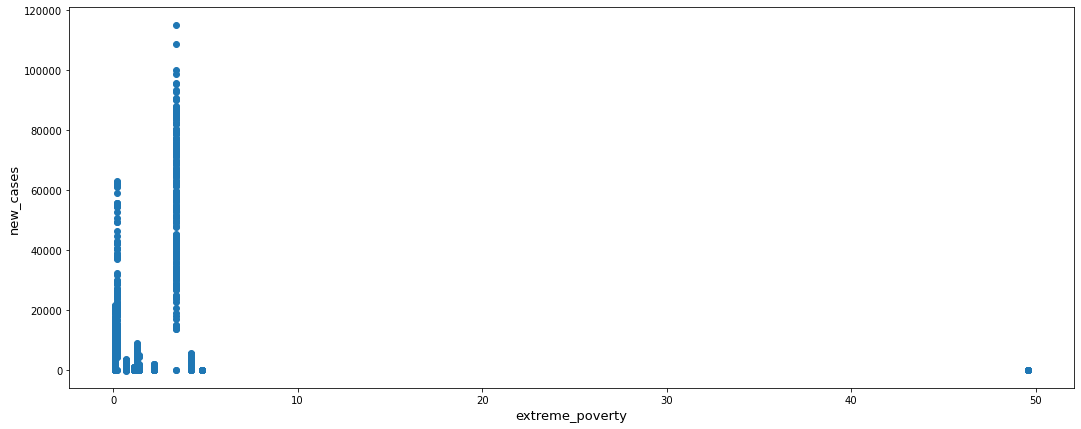

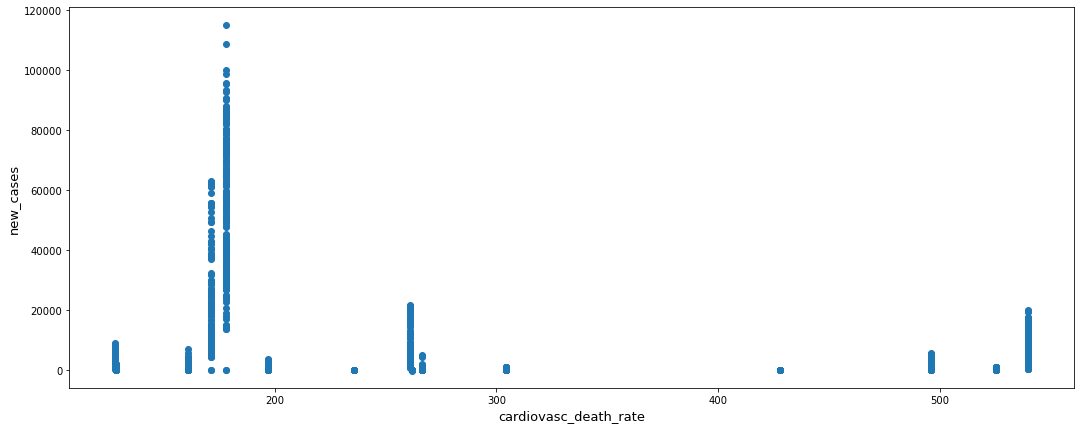

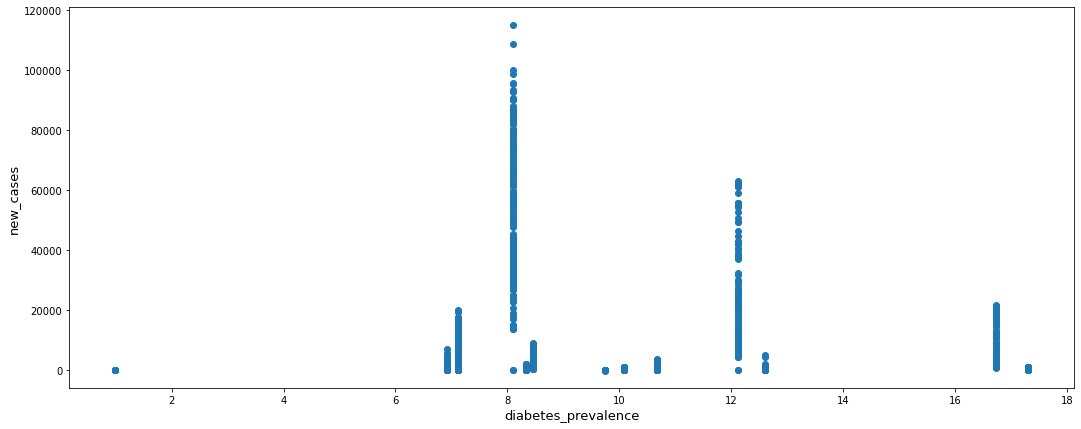

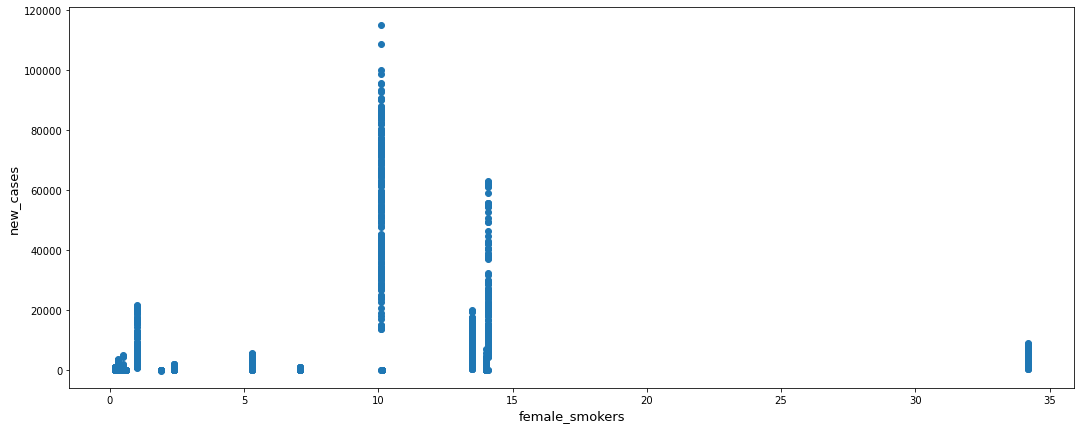

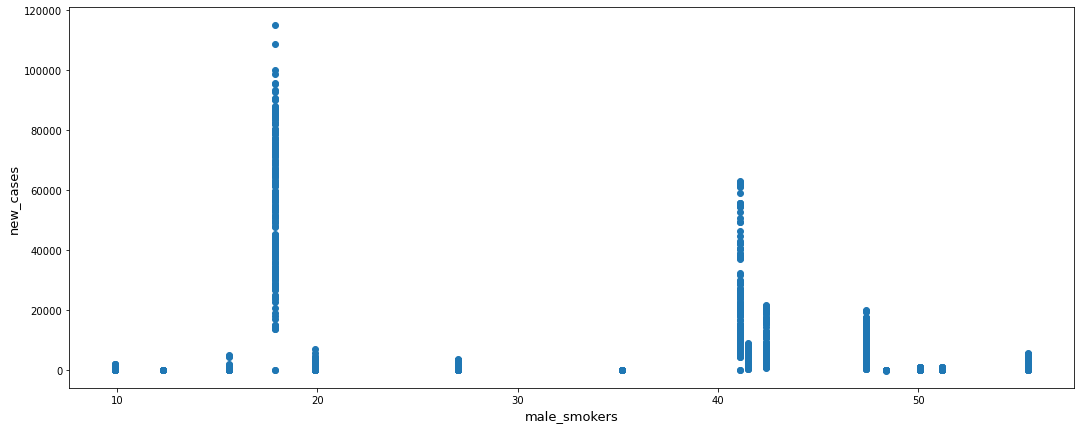

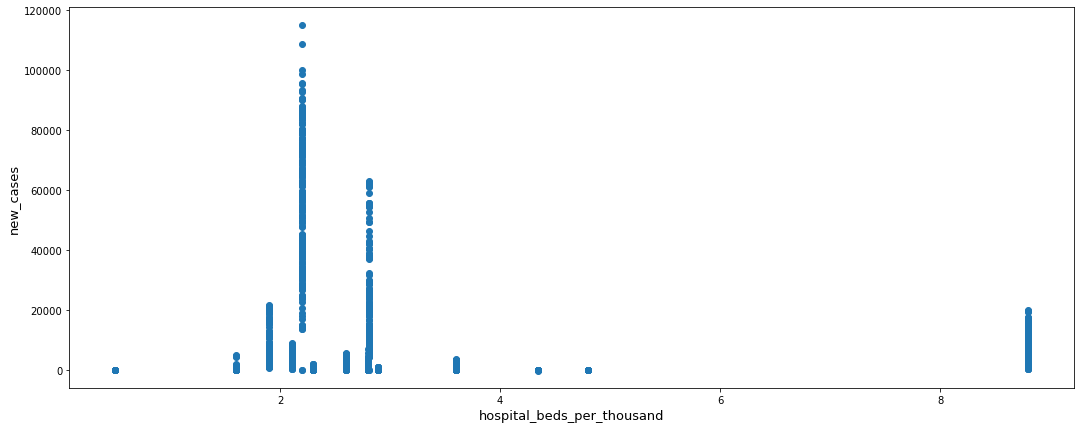

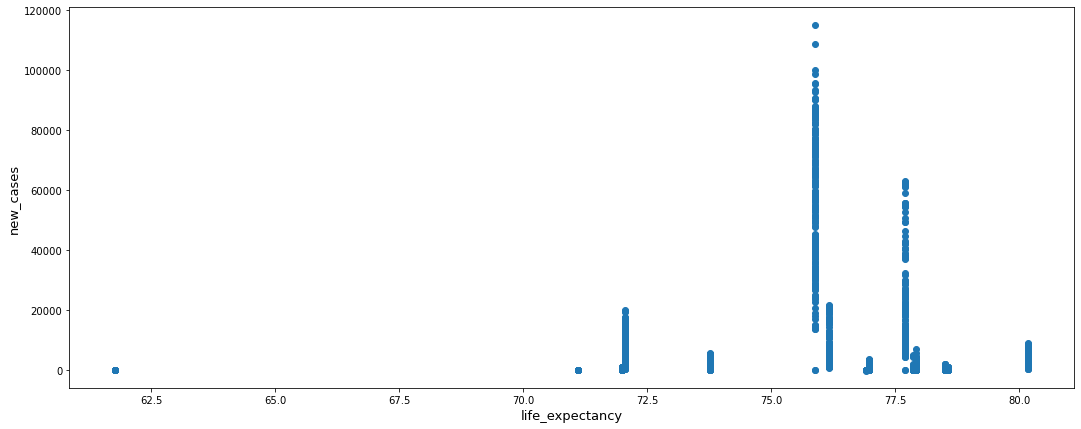

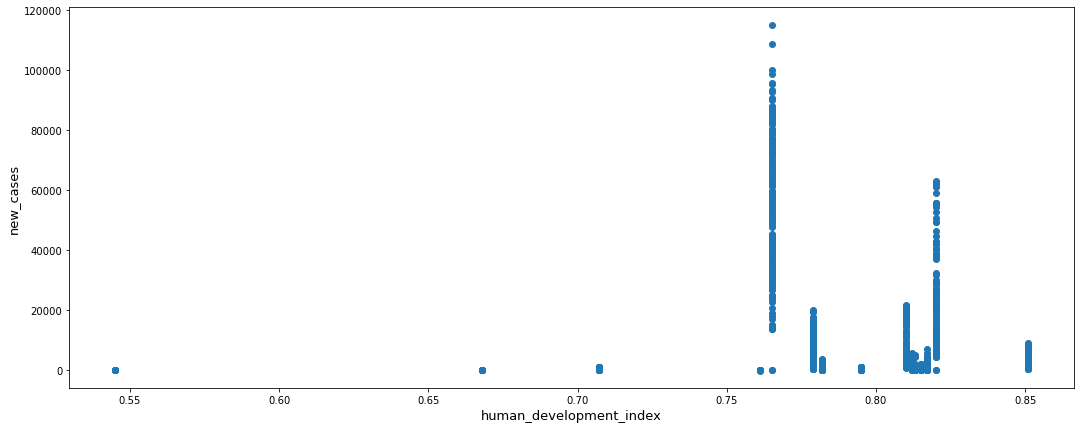

In [353]:
for feature in after_vacc_data:
            if after_vacc_data[feature].dtype == "float64" or "int64":
                if feature != 'new_cases':
                    fig, ax = plt.subplots()
                    ax.scatter(x = after_vacc_data[feature], y = after_vacc_data['new_cases'])
                    plt.ylabel('new_cases', fontsize=13)
                    plt.xlabel(feature, fontsize=13)
                    plt.show()  

In [354]:
a=after_vacc_data.loc[after_vacc_data.location=='Albania'].reproduction_rate.fillna(1)
a.isnull().sum()

0

In [355]:
after_vacc_data.loc[after_vacc_data['location']==column].isnull().sum()>0

iso_code                                 False
continent                                False
location                                 False
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
new_tests                                False
total_tests                              False
total_tests_per_thousand                 False
new_tests_per_thousand                   False
new_tests_smoothed                       False
new_tests_smo

In [356]:
col=[]
for column in cols_to_consider:
    if(new_data.loc[new_data['location']==column].positive_rate.isnull().sum()>400):
        col.append(column)
        
col

['Oman',
 'Tajikistan',
 'Benin',
 'Egypt',
 'Thailand',
 'Georgia',
 'China',
 'Cambodia',
 'Brazil']

In [357]:
latest_cols= [x for x in cols_to_consider if not x in col or col.remove(x)]

In [358]:
latest_cols

['Albania',
 'South Africa',
 'Bangladesh',
 'Malaysia',
 'Turkey',
 'Colombia',
 'Paraguay',
 'Kazakhstan',
 'Panama',
 'El Salvador',
 'Uruguay',
 'Ecuador',
 'Chile',
 'Indonesia',
 'Pakistan',
 'Sri Lanka',
 'Ukraine',
 'Armenia',
 'Philippines']

In [359]:
for column in latest_cols:
    print(column," ",new_data.loc[new_data['location']==column].positive_rate.isnull().sum())

Albania   82
South Africa   49
Bangladesh   10
Malaysia   7
Turkey   67
Colombia   97
Paraguay   12
Kazakhstan   76
Panama   12
El Salvador   140
Uruguay   24
Ecuador   202
Chile   38
Indonesia   21
Pakistan   22
Sri Lanka   34
Ukraine   44
Armenia   19
Philippines   72


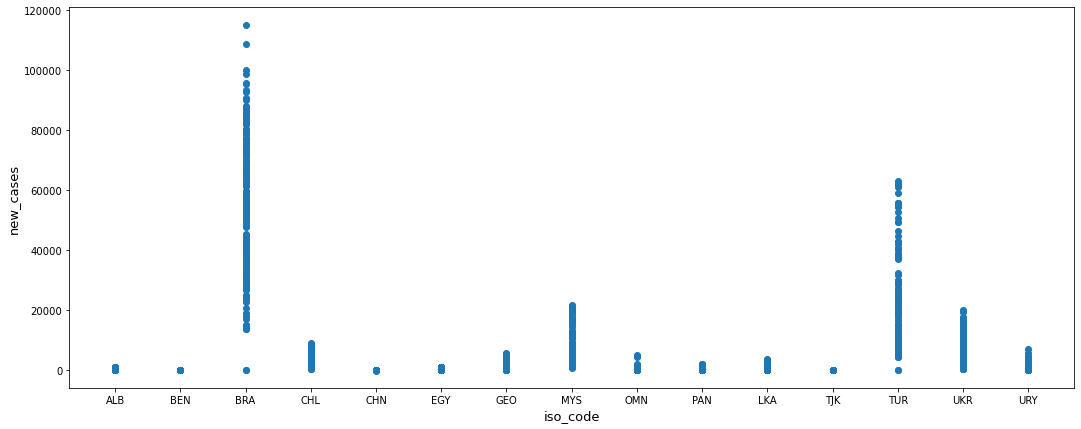

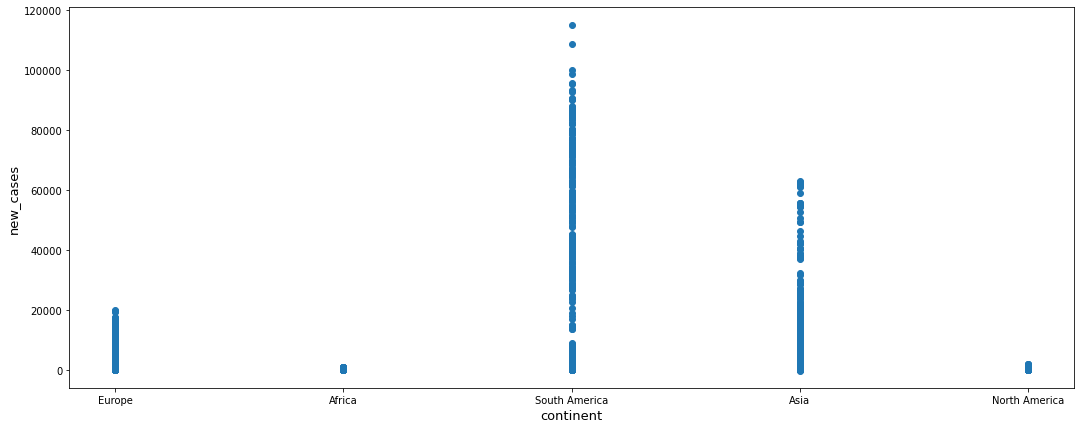

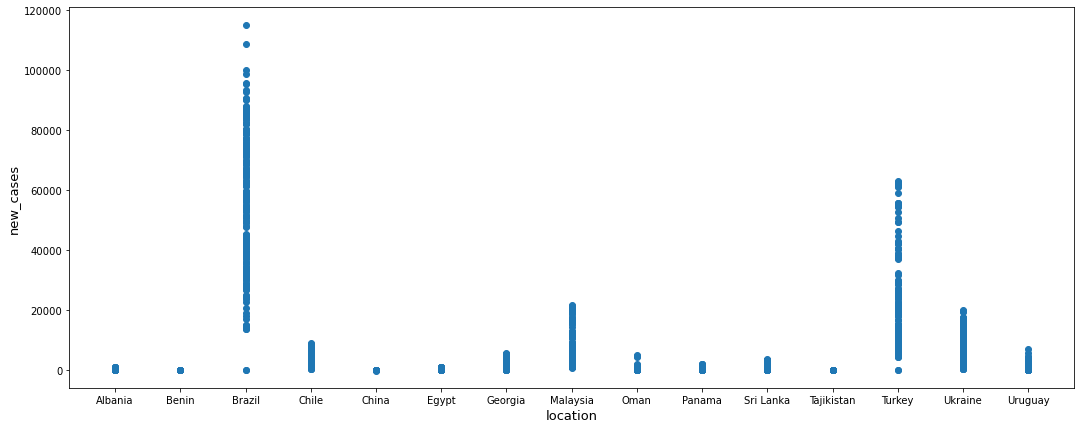

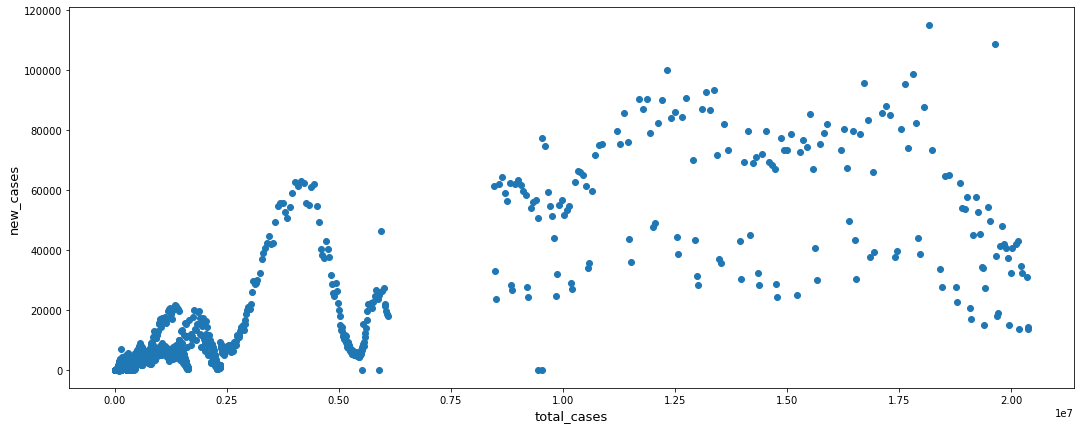

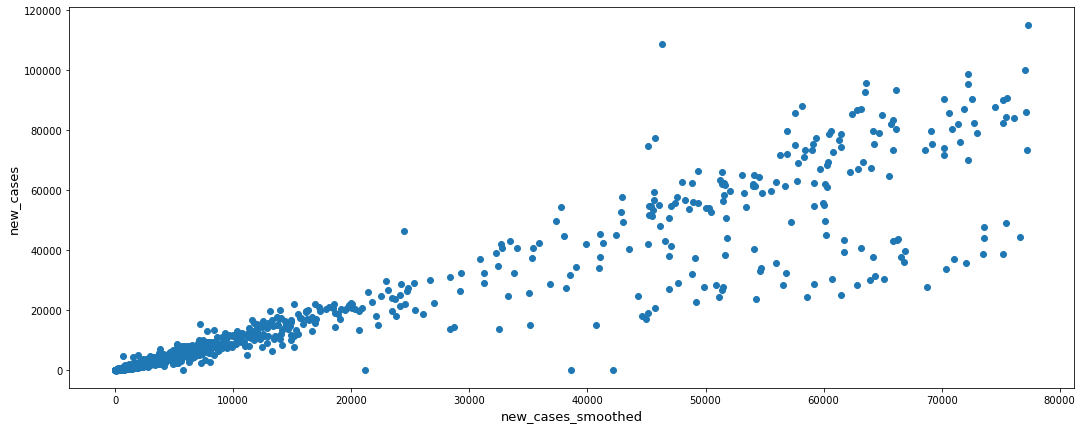

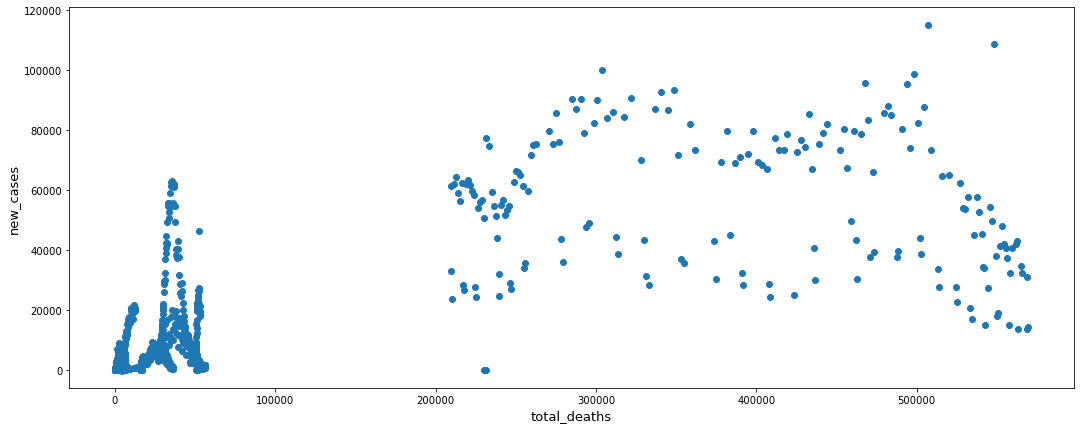

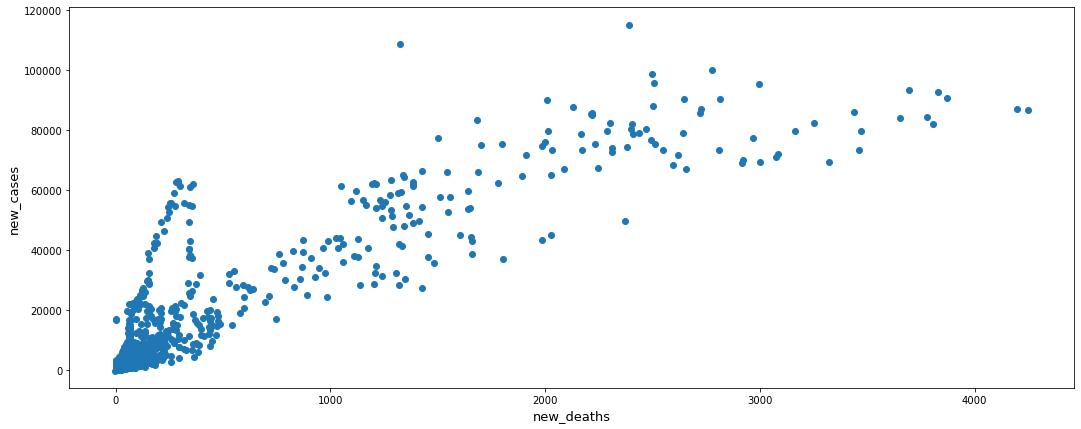

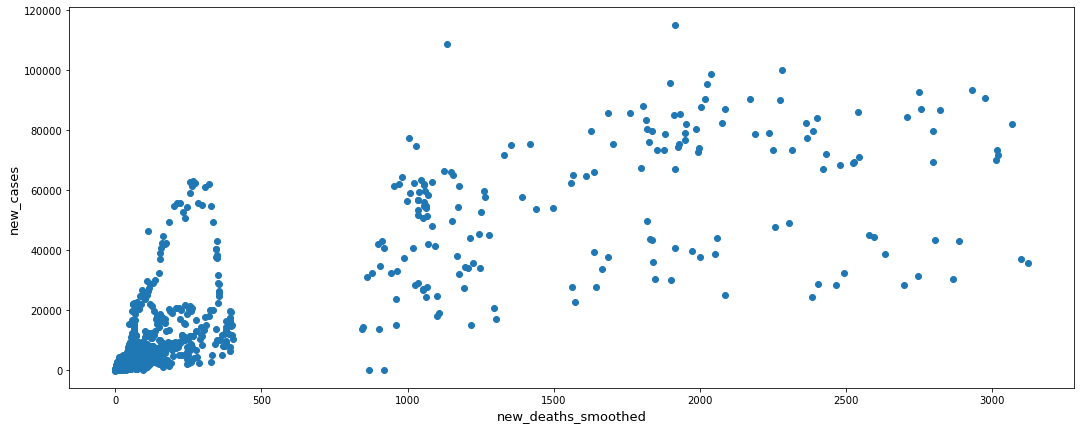

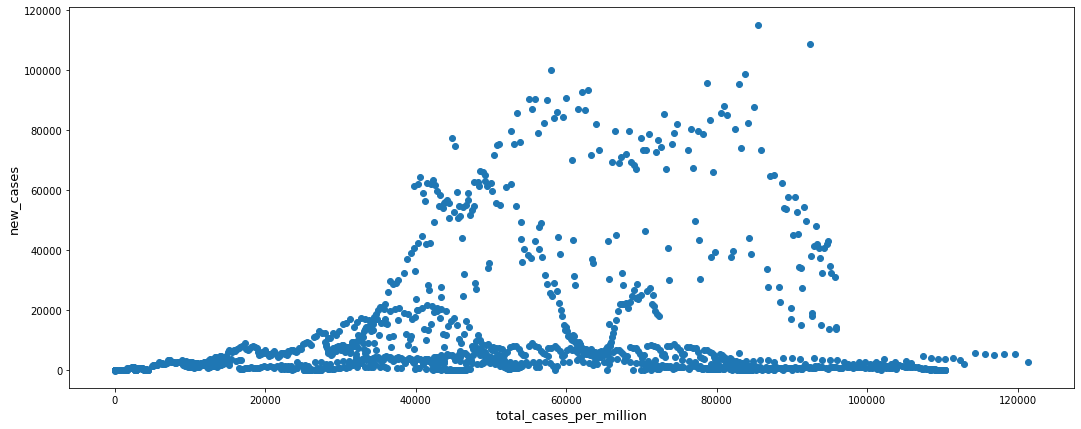

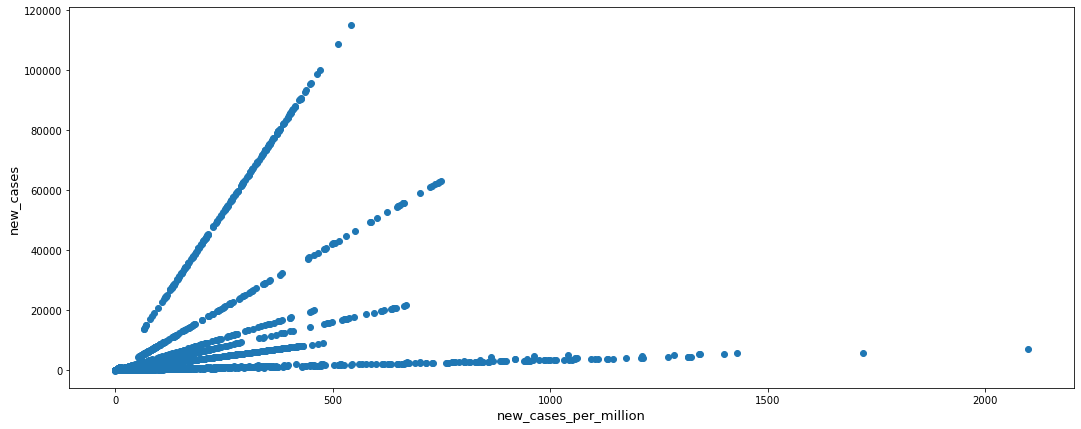

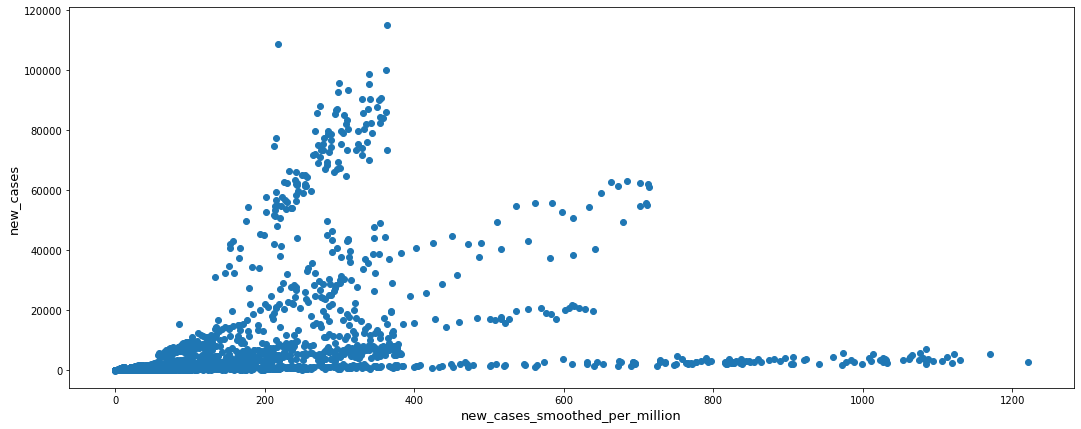

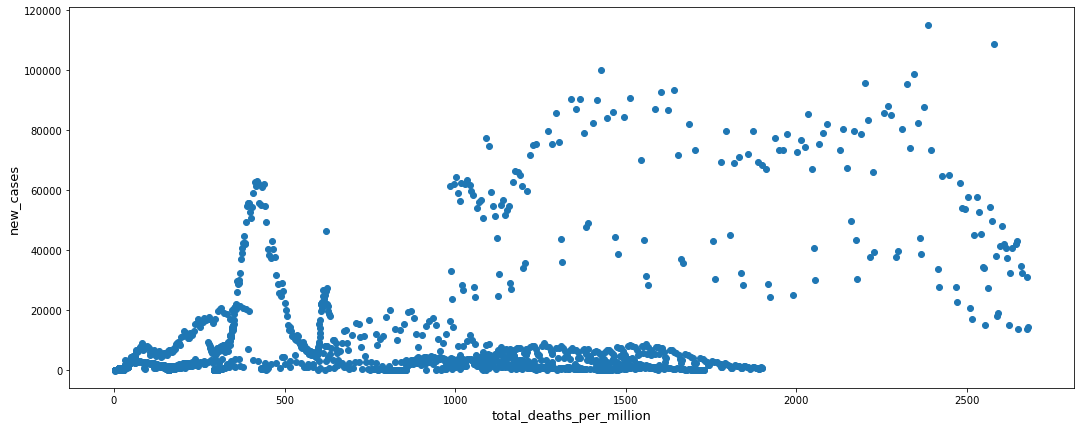

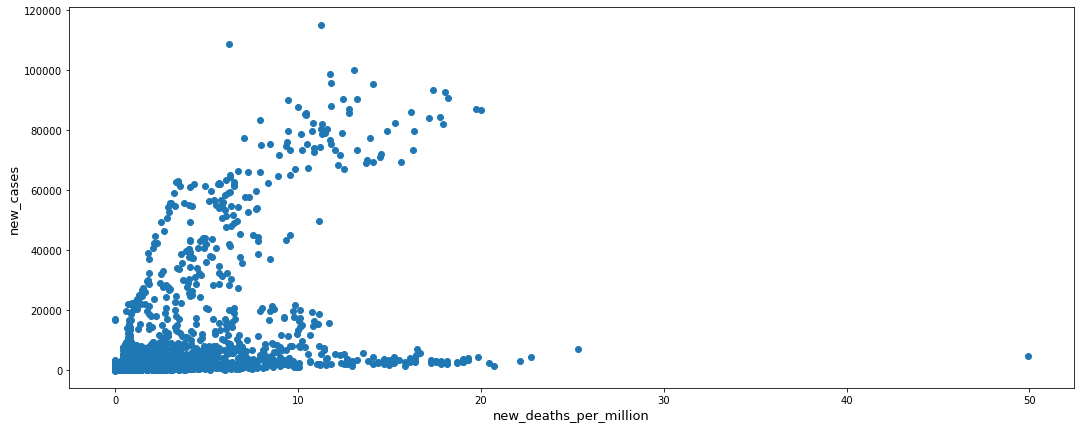

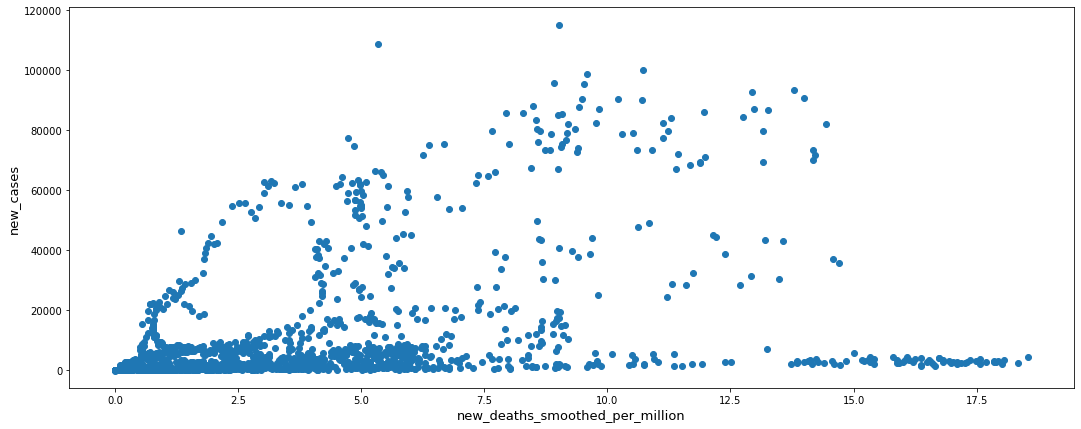

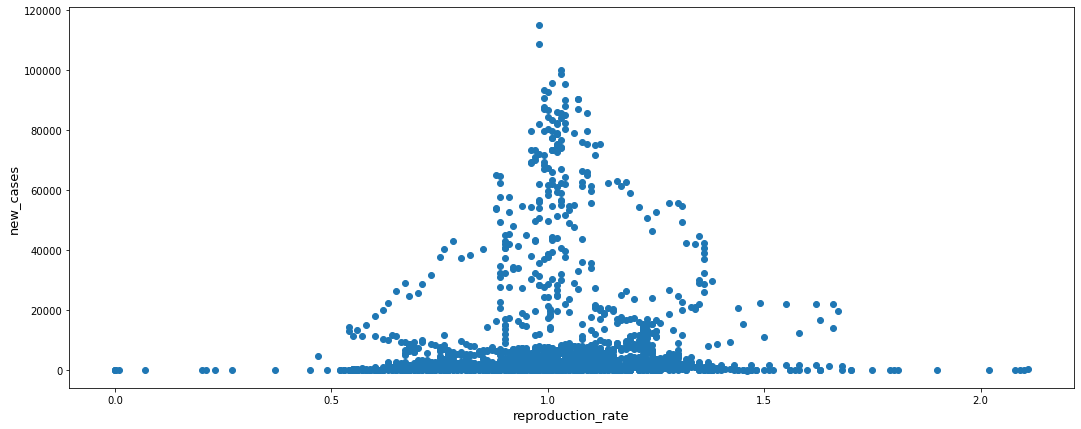

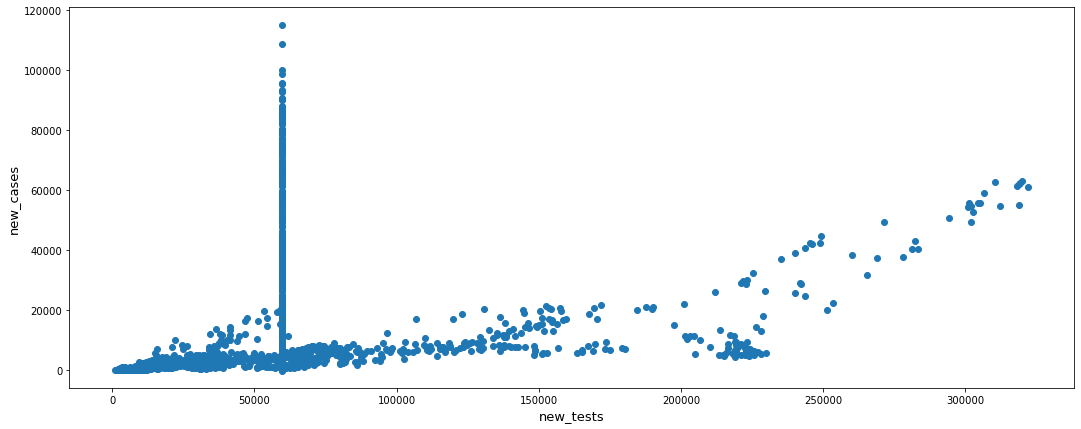

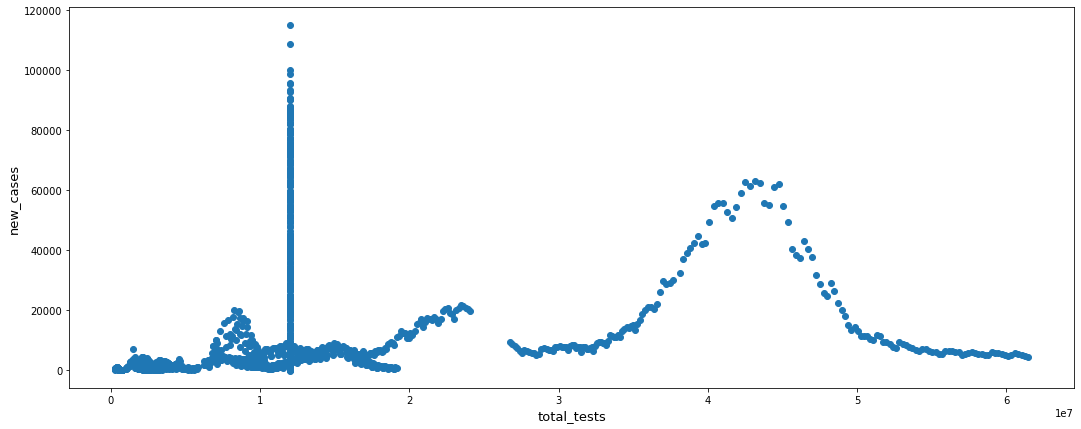

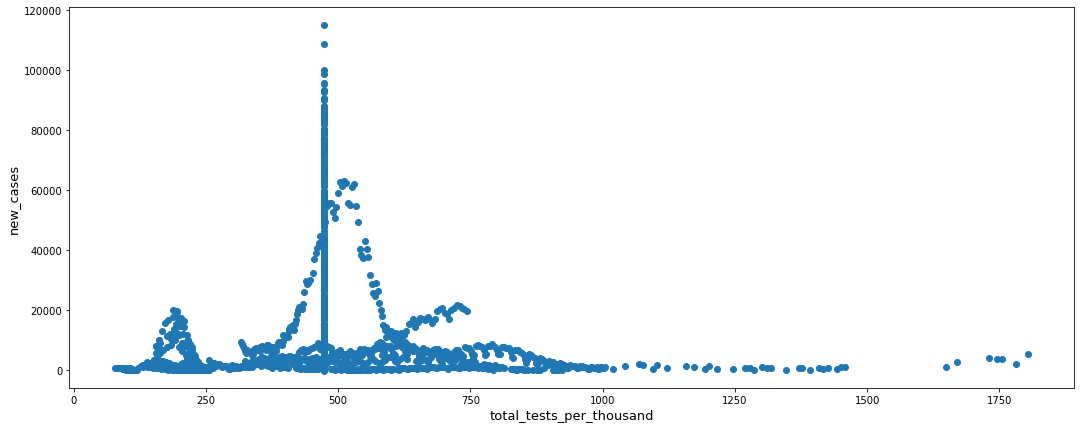

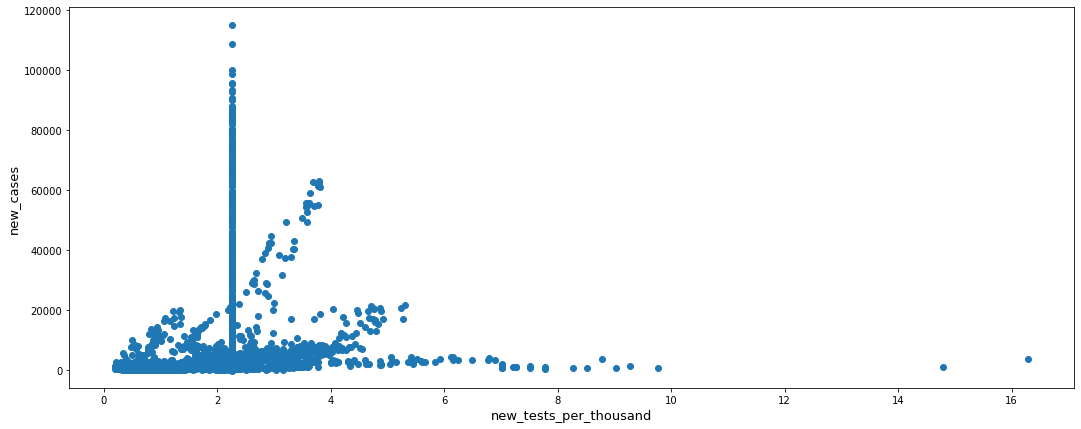

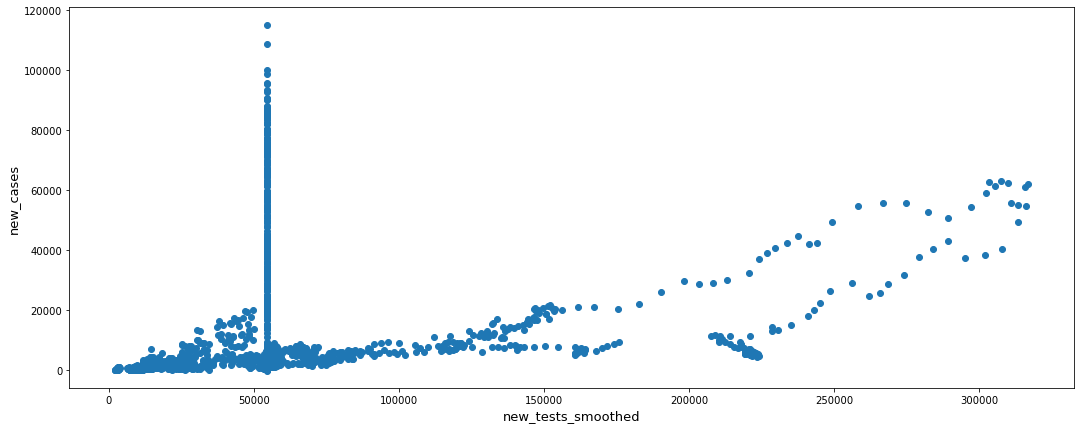

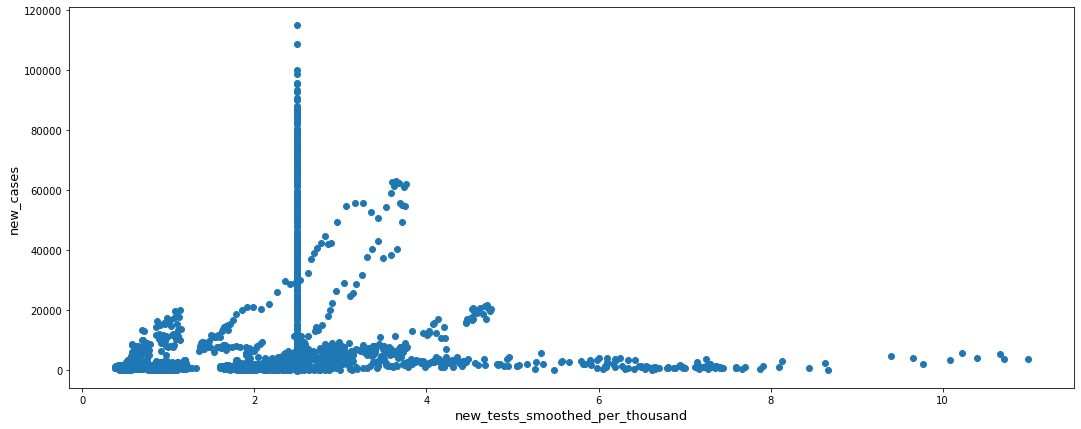

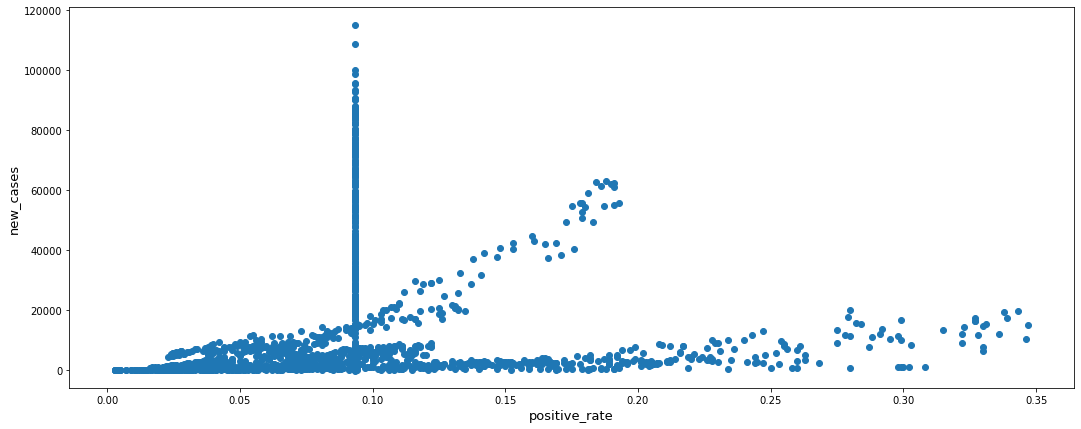

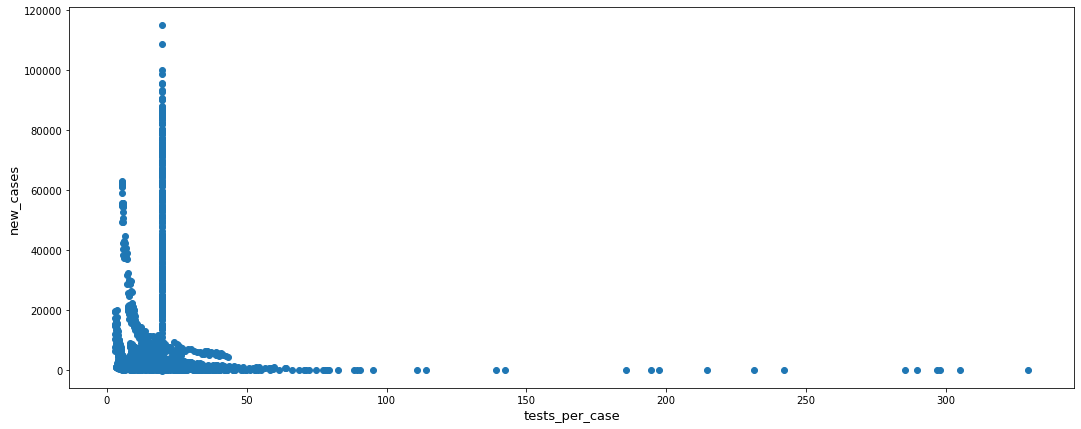

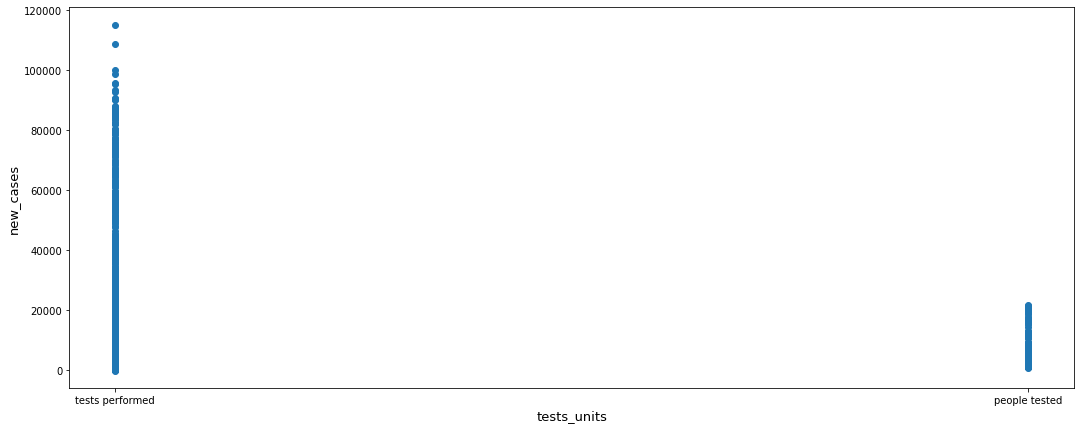

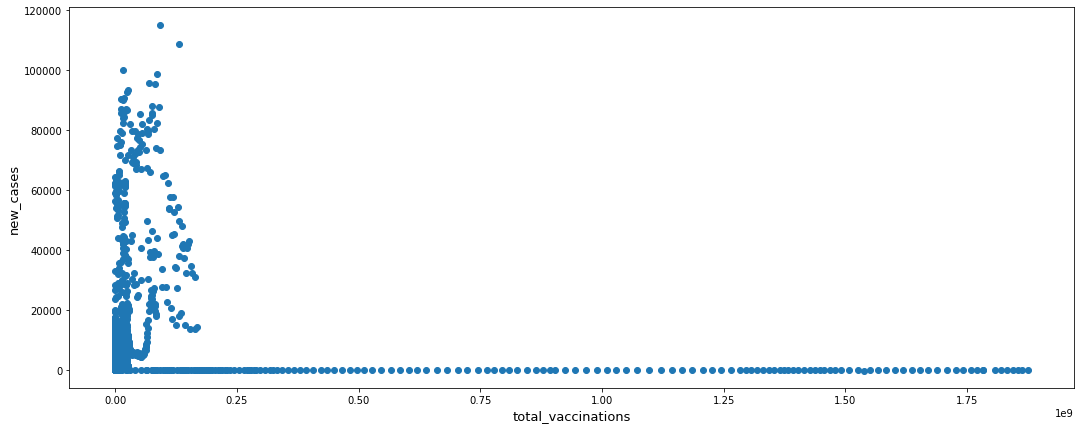

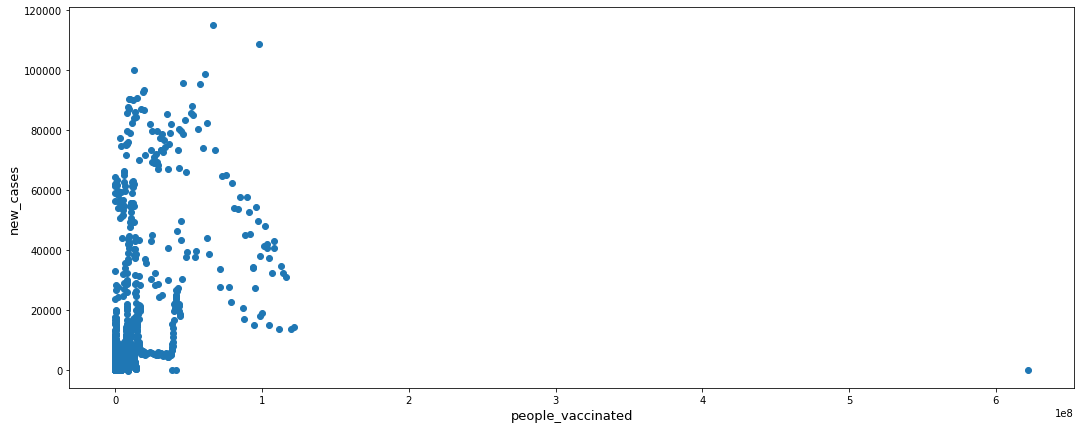

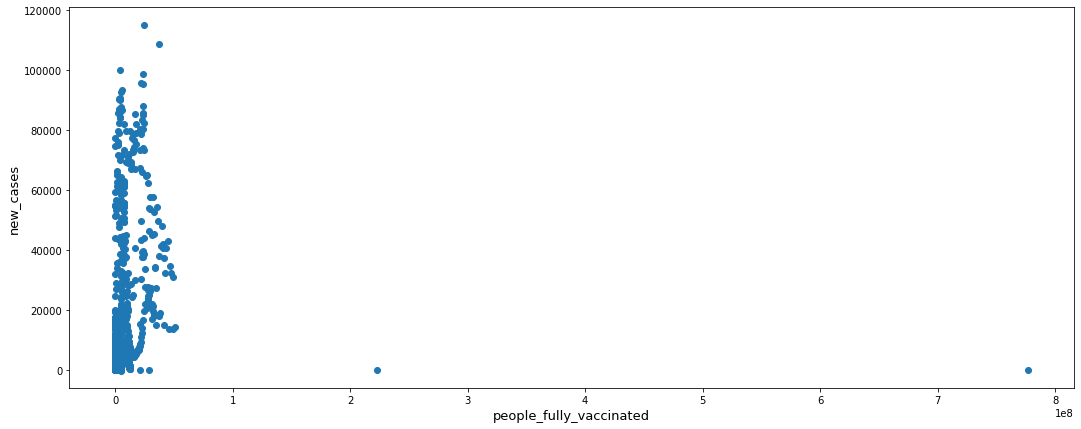

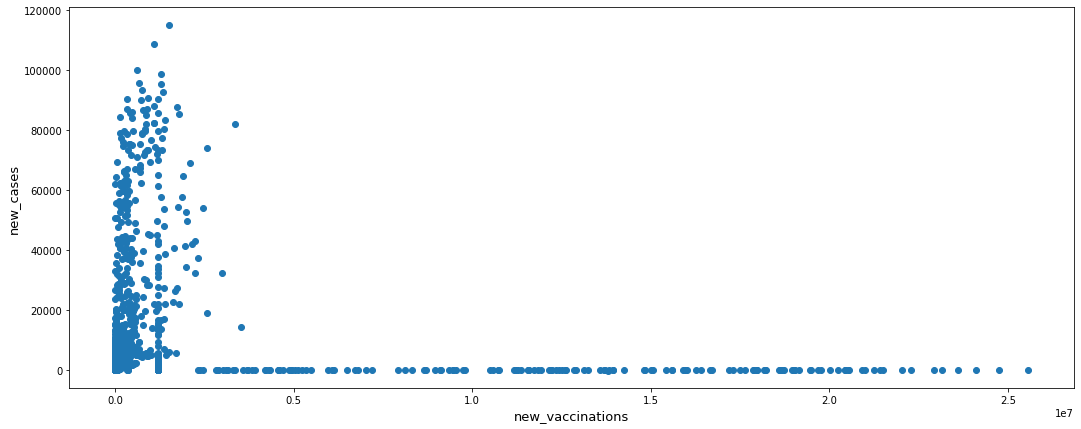

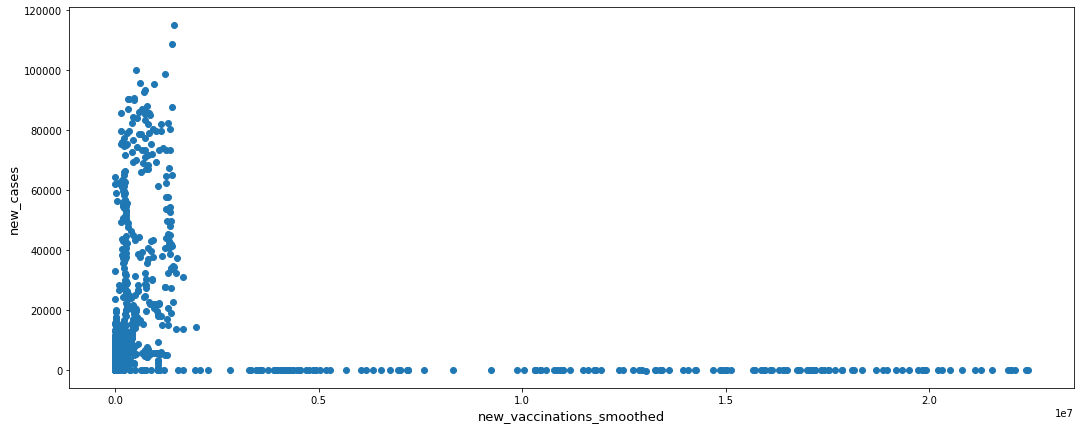

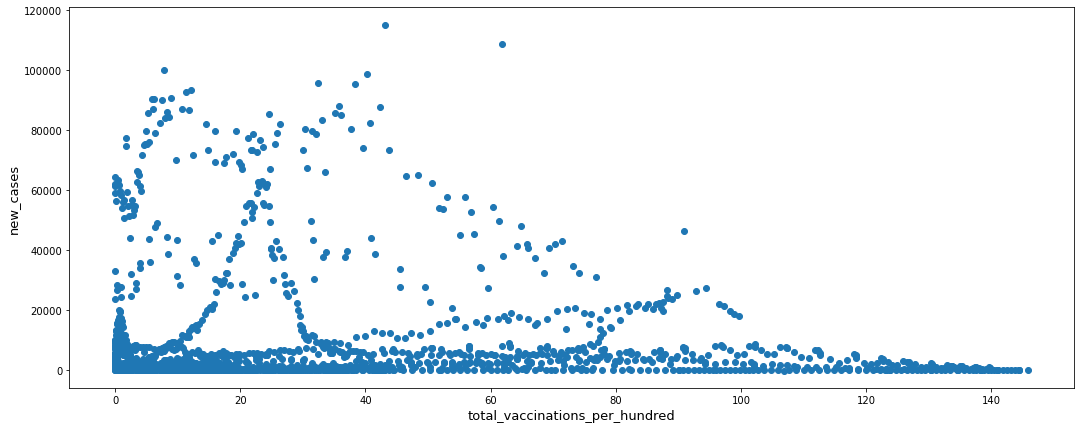

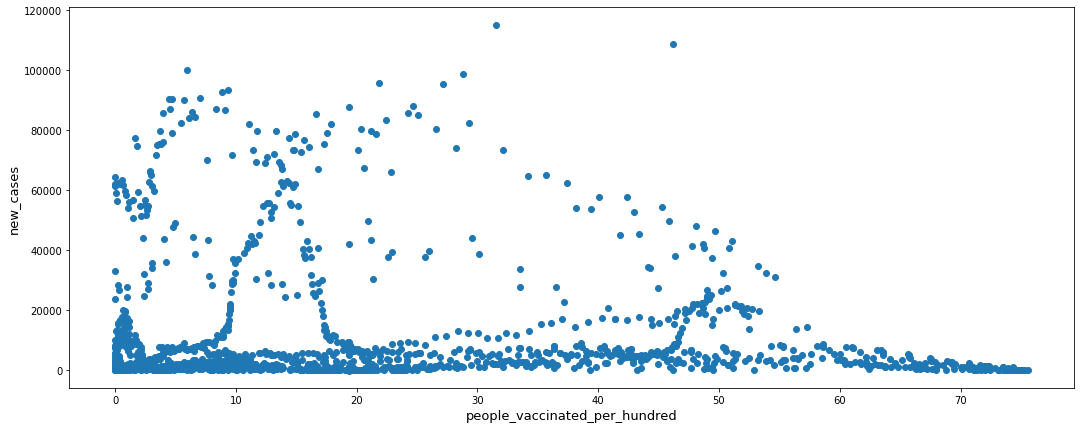

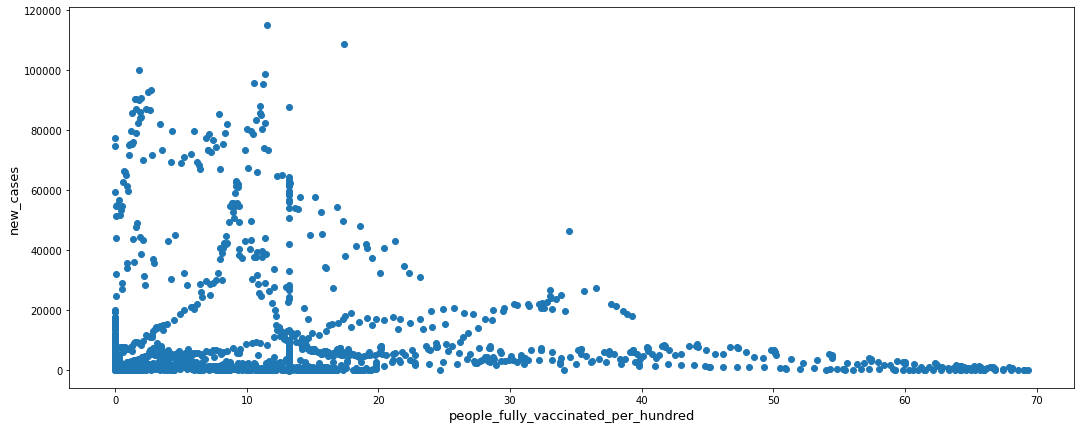

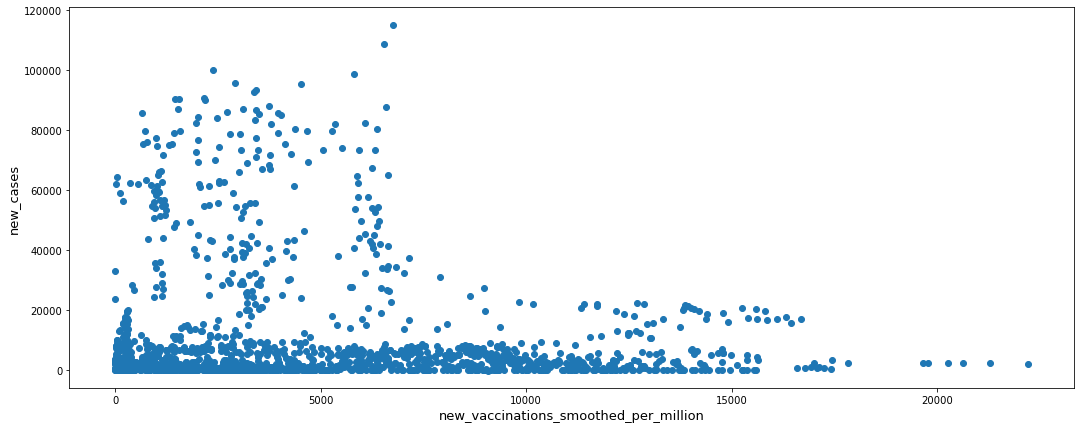

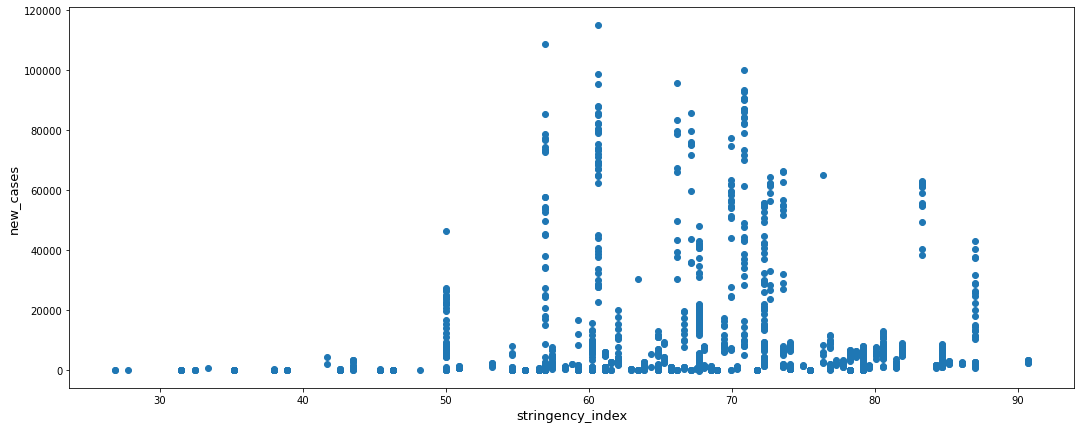

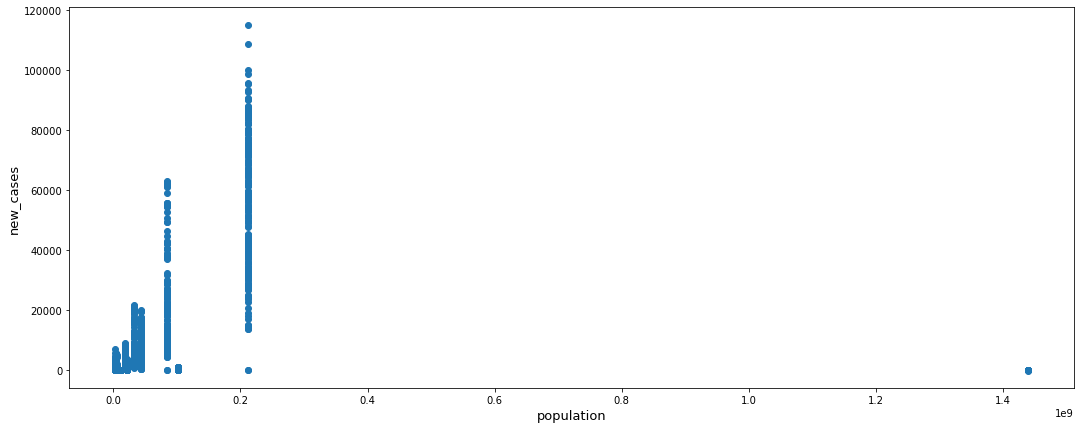

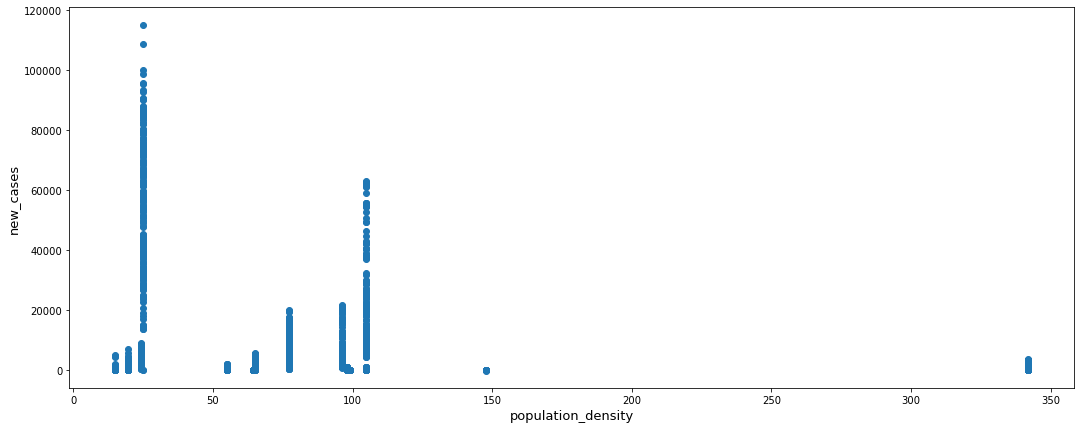

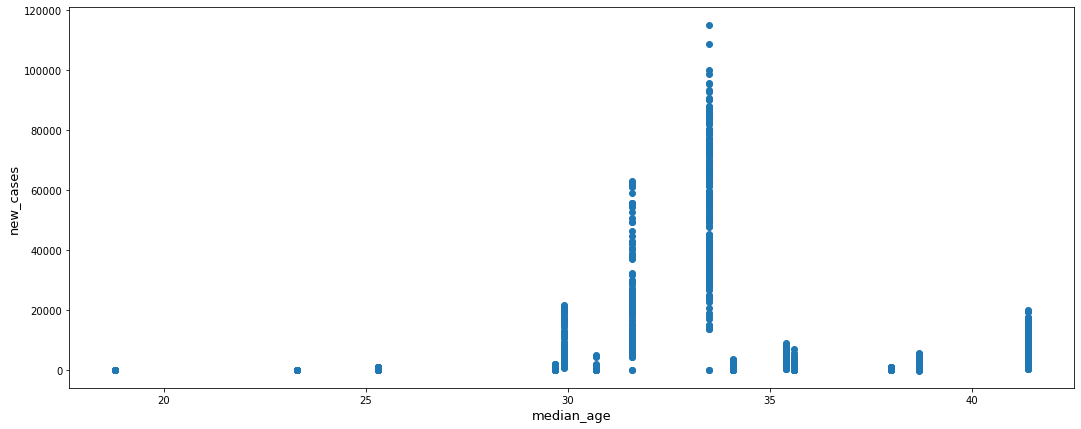

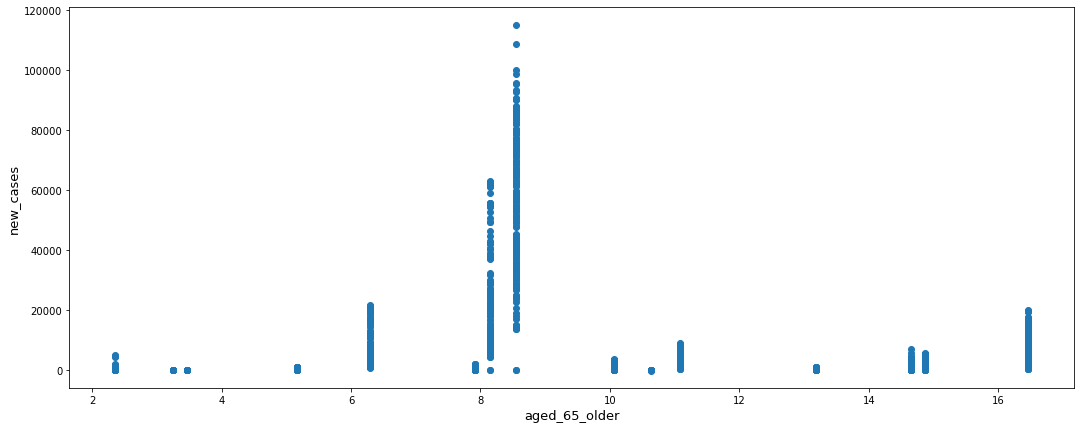

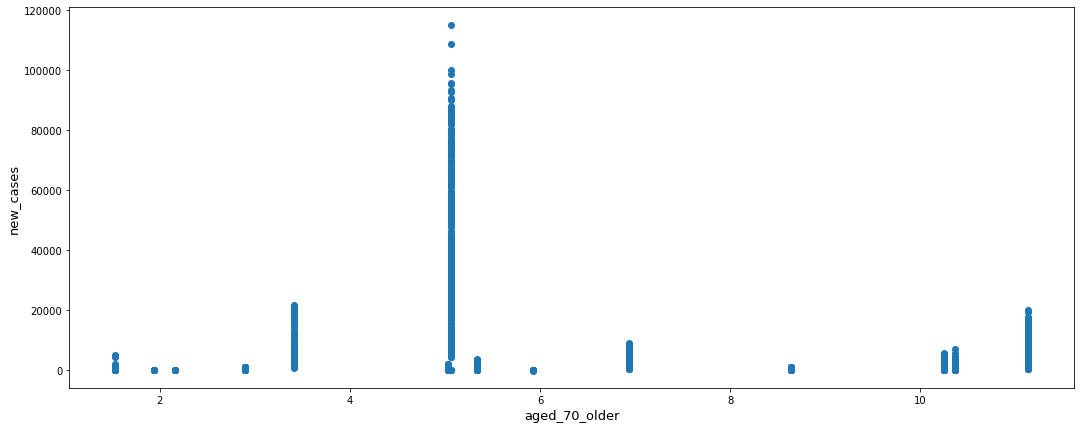

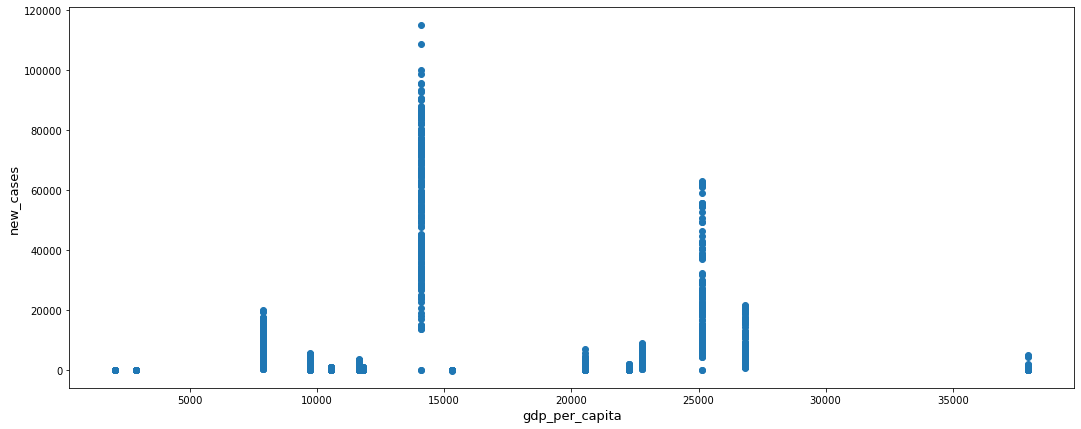

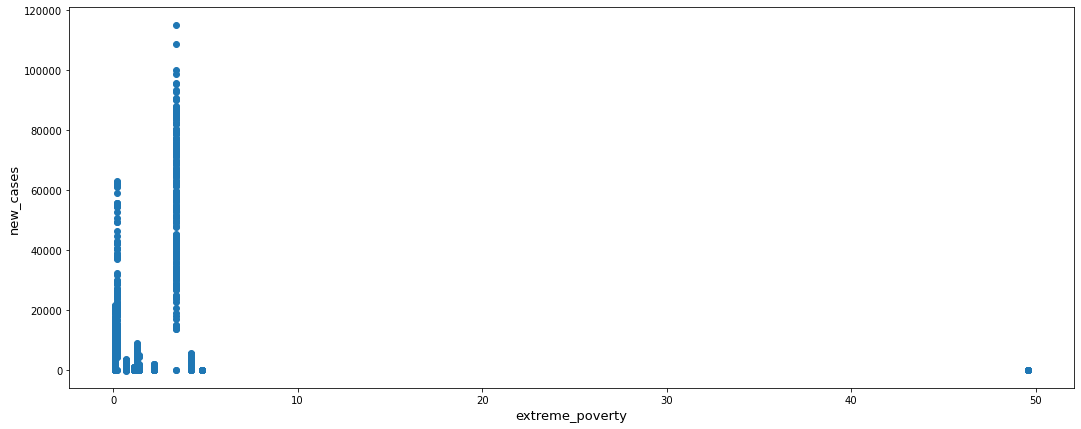

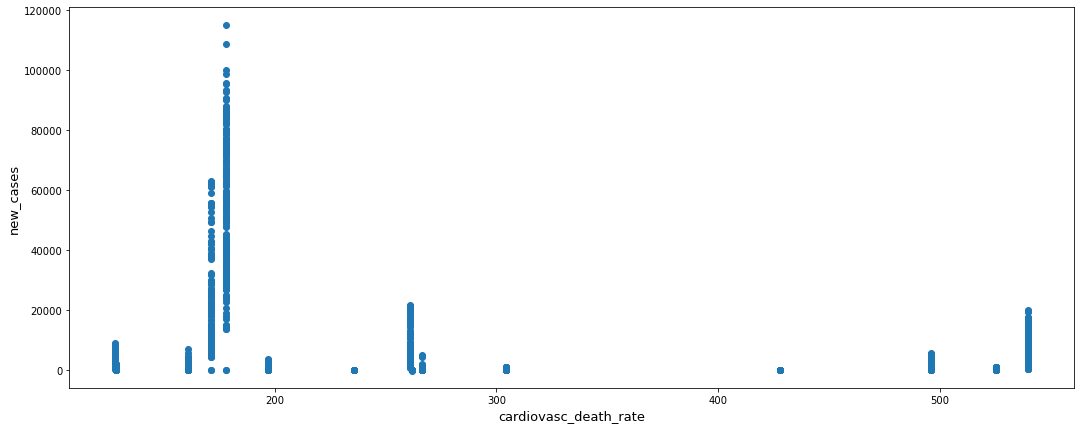

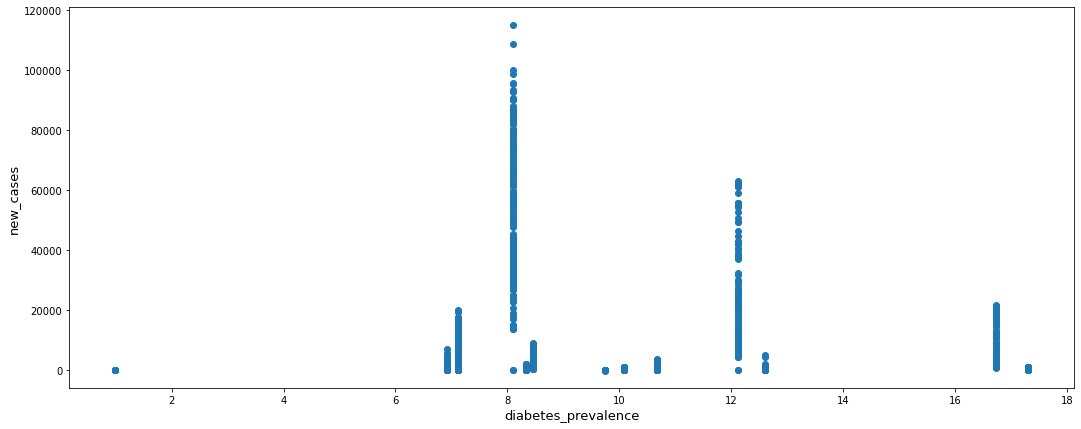

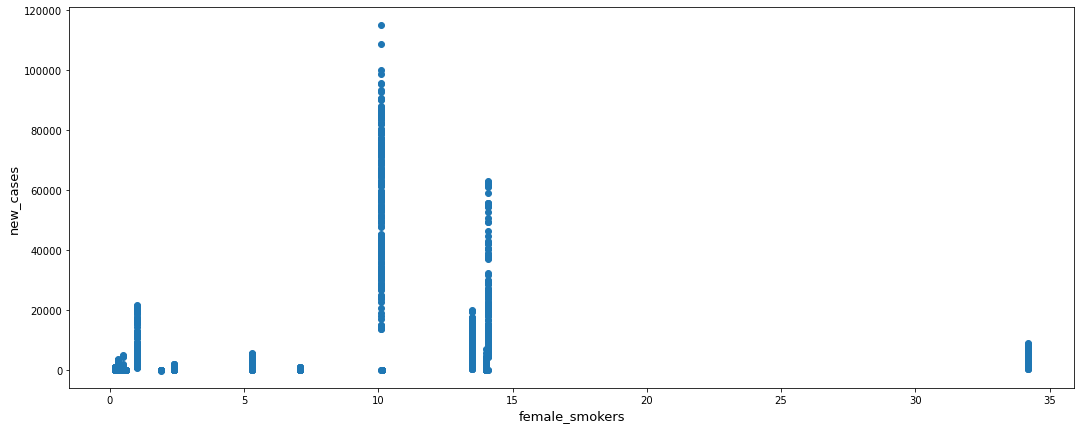

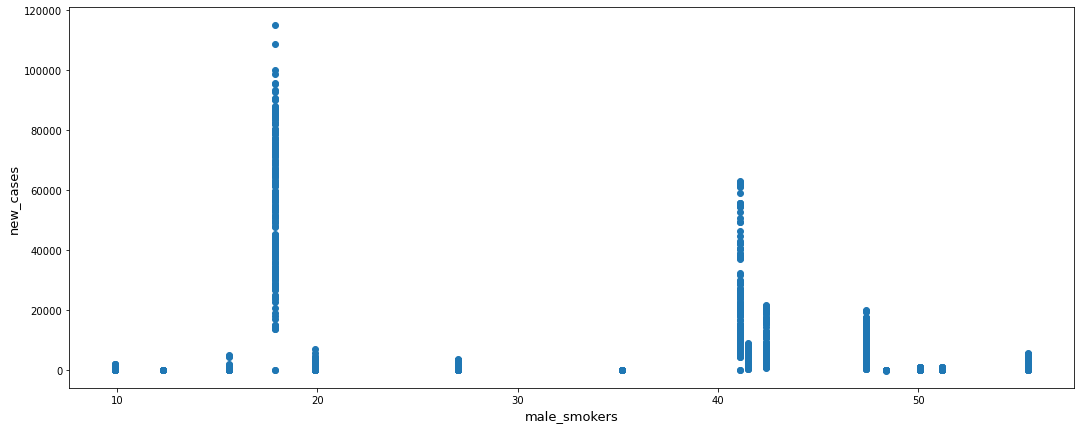

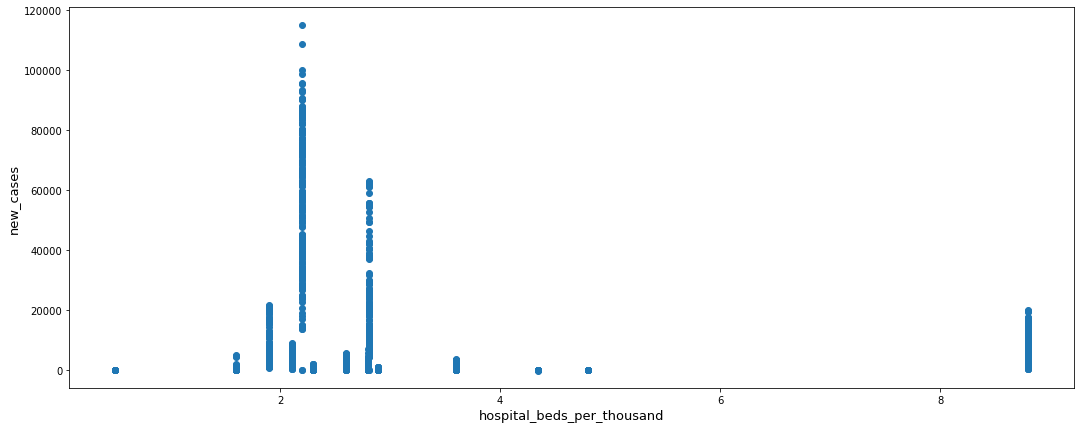

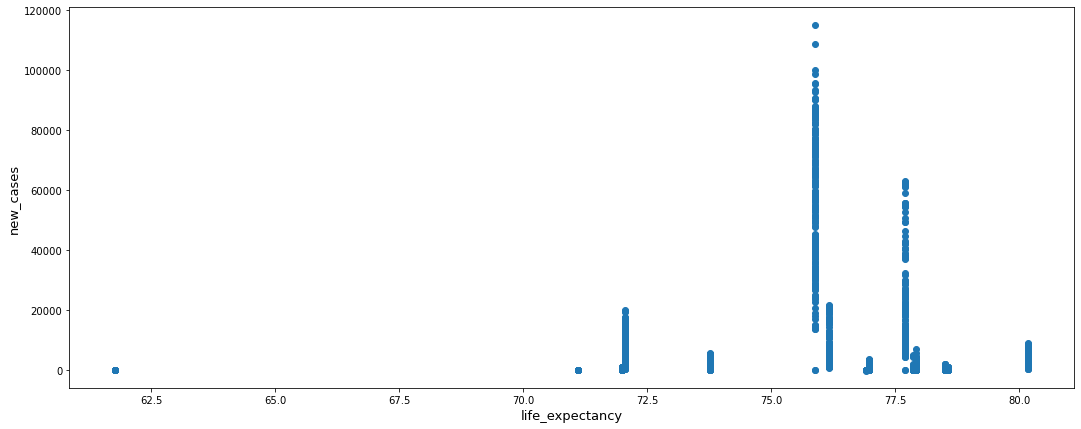

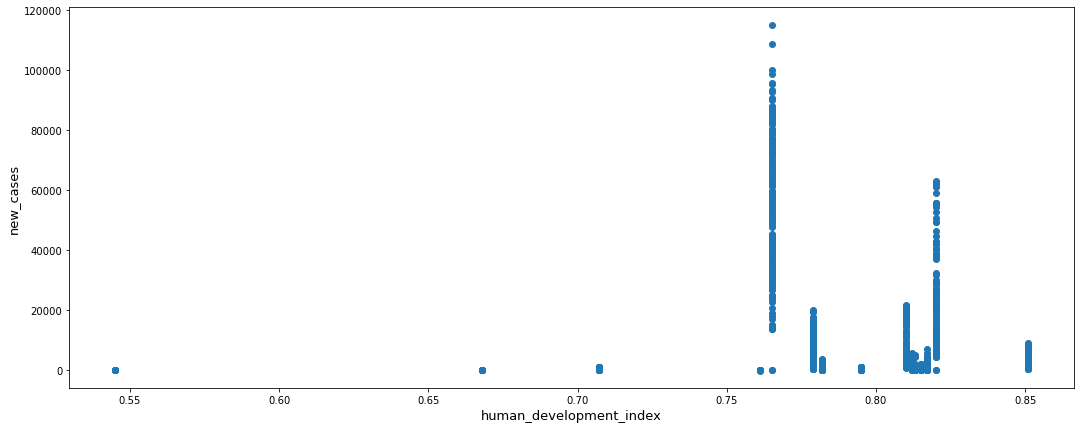

In [360]:
for feature in after_vacc_data:
            if after_vacc_data[feature].dtype == "float64" or "int64":
                if feature != 'new_cases':
                    fig, ax = plt.subplots()
                    ax.scatter(x = after_vacc_data[feature], y = after_vacc_data['new_cases'])
                    plt.ylabel('new_cases', fontsize=13)
                    plt.xlabel(feature, fontsize=13)
                    plt.show()  

In [361]:
new_data=new_data[~new_data.location.isin(cols)]
new_data

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [ ]:
new_data[missing_data_cols].isnull().sum()

In [ ]:
new_data=data[data.location.isin(cols_to_consider)]
new_data

In [362]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'numpy',
 'pandas',
 'matplotlib.pyplot',
 'seaborn',
 'dabl',
 'sklearn.model_selection',
 'types']

In [364]:
import wget

UsageError: Line magic function `%watermark` not found.


In [368]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,matplotlib.pyplot,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

wget             : 3.2
pandas           : 1.2.4
numpy            : 1.20.1
matplotlib.pyplot: unknown
watermark        : 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
CPU cores   : 12
Architecture: 64bit

 
Last updated: Mon Oct 25 2021 20:12:54India Standard Time

